# Veri Yoğun Uygulamalar Modül Projesi: Zaman Serisi Sınıflandırma Problemi
Dr. İsmail Güzel

Milli Teknoloji Hamlesi kapsamında düzenlenen Yapay Zeka Uzmanlık Programı dahilinde, 18 saatlik Veri Yoğun Uygulamalar Eğitimi sonunda bu projenin tamamlanması beklenmektedir.

### **Proje Başlığı: Hisse Senetlerinin Sektörel Benzerlik Analizi ve Sınıflandırma Modeli Geliştirilmesi**

#### **Proje Amacı:**
Farklı sektörlerdeki hisse senetlerinin zaman serisi davranışlarını analiz ederek, bir hisse senedinin hangi sektöre daha çok benzediğini tespit etmek ve bu bilgiyi yatırım stratejileri için kullanmak.

---

Bu proje T.C. Sanayi ve Teknoloji Bakanlığı bünyesinde gerçekleştirilen Milli Teknoloji Akademisi Yapay Zeka Uzmanlık Eğitimi Veri Yoğun Uygulamalar modül projesi olarak hazırlanmıştır.


*Enise Ahsen Karadağ*

### **1. Veri Toplama:**

Sector ve Industry bilgileri BeautifulSoup ile çekilir.

In [ ]:
import yfinance
import pandas as pd
import requests
from bs4 import BeautifulSoup
from io import StringIO

def fetch_sectors_names():
    url = "https://stockanalysis.com/stocks/industry/sectors/"
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, "html.parser")
        df=pd.read_html(StringIO(str(soup.find_all("table"))))[0]
    else:
        print(f"Error: Failed to fetch data from page {url}")

    return df

def fetch_industry_names():
    url = "https://stockanalysis.com/stocks/industry/all/"
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, "html.parser")
        df=pd.read_html(StringIO(str(soup.find_all("table"))))[0]
    else:
        print(f"Error: Failed to fetch data from page {url}")

    return df

def fetch_data(sectors):
    url = f"https://stockanalysis.com/stocks/sector/{sectors}/"
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, "html.parser")
        df=pd.read_html(StringIO(str(soup.find_all("table"))))[0]
        df.drop(columns='No.', inplace=True)
    else:
        print(f"Error: Failed to fetch data from page {url}")

    return df

In [ ]:
sectors=fetch_sectors_names()
industry=fetch_industry_names()

In [ ]:
sectors

,Sector Name,Stocks,Market Cap,Div. Yield,PE Ratio,Profit Margin,1D Change,1Y Change
0,Financials,1275,11.95T,0.17%,16.04,19.77%,-0.69%,35.09%
1,Healthcare,1162,"8,072.69B",0.49%,64.72,2.97%,-0.47%,12.22%
2,Technology,771,21.36T,0.43%,46.10,14.44%,-0.47%,46.27%
3,Industrials,663,"5,974.43B",1.19%,29.79,7.20%,-0.75%,28.25%
4,Consumer Discretionary,561,"9,003.90B",0.76%,31.55,6.22%,-0.46%,45.43%
5,Materials,265,"2,016.21B",1.70%,28.65,5.99%,-1.00%,10.25%
6,Real Estate,263,"1,659.42B",3.80%,49.87,9.33%,-0.26%,10.63%
7,Energy,252,"3,612.89B",3.16%,12.96,8.28%,-2.21%,8.99%
8,Communication Services,247,"6,937.24B",1.44%,32.34,11.21%,0.47%,42.94%
9,Consumer Staples,243,"4,189.94B",1.52%,29.00,4.95%,-0.75%,23.80%


In [ ]:
sectors.to_csv('/content/sample_data/stock_sectors2/sectors.csv')
industry.to_csv('/content/sample_data/stock_sectors2/industry.csv')

In [ ]:
industry

,Industry Name,Stocks,Market Cap,Div. Yield,PE Ratio,Profit Margin,1D Change,1Y Change
0,Biotechnology,659,875.81B,0.17%,-,-44.59%,0.03%,34.19%
1,Asset Management,507,"1,495.70B",5.60%,23.45,17.82%,-0.08%,40.80%
2,Banks - Regional,352,"1,644.15B",2.20%,13.07,25.17%,-0.51%,27.79%
3,Software - Application,237,"2,982.59B",0.20%,93.15,9.16%,0.16%,72.37%
4,Software - Infrastructure,152,"5,069.62B",0.22%,41.58,23.22%,-0.15%,26.30%
...,...,...,...,...,...,...,...,...
140,Department Stores,4,17.23B,5.65%,13.15,2.12%,-0.76%,6.42%
141,Confectioners,4,109.97B,3.10%,19.37,11.86%,-1.04%,-23.46%
142,Financial Conglomerates,4,31.75B,2.94%,11.51,9.33%,-1.19%,7.87%
143,Silver,3,4.13B,0.17%,79.43,6.78%,-3.70%,46.16%


In [ ]:
fetch_data(sectors='energy').to_csv('/content/sample_data/stock_sectors2/energy.csv')
fetch_data(sectors='financials').to_csv('/content/sample_data/stock_sectors2/financials.csv')
fetch_data(sectors='healthcare').to_csv('/content/sample_data/stock_sectors2/healthcare.csv')
fetch_data(sectors='technology').to_csv('/content/sample_data/stock_sectors2/technology.csv')
fetch_data(sectors='utilities').to_csv('/content/sample_data/stock_sectors2/utilities.csv')
fetch_data(sectors='real-estate').to_csv('/content/sample_data/stock_sectors2/real-estate.csv')
fetch_data(sectors='materials').to_csv('/content/sample_data/stock_sectors2/materials.csv')
fetch_data(sectors='technology').to_csv('/content/sample_data/stock_sectors2/technology.csv')
fetch_data(sectors='industrials').to_csv('/content/sample_data/stock_sectors2/industrials.csv')
fetch_data(sectors='consumer-staples').to_csv('/content/sample_data/stock_sectors2/consumer-staples.csv')
fetch_data(sectors='consumer-discretionary').to_csv('/content/sample_data/stock_sectors2/consumer-discretionary.csv')
fetch_data(sectors='communication-services').to_csv('/content/sample_data/stock_sectors2/communication-services.csv')

Sektör bilgileri daha sonra kullanılmak amacıyla csv formatında kaydedilir.

In [ ]:
finance = pd.read_csv('/content/sample_data/stock_sectors2/financials.csv')

In [ ]:
finance.head()

,Unnamed: 0,Symbol,Company Name,Market Cap,% Change,Volume,Revenue
0,0,BRK.B,Berkshire Hathaway Inc.,"1,010.43B",-0.78%,1909727,369.89B
1,1,JPM,JPMorgan Chase & Co.,747.80B,-0.35%,5282793,166.88B
2,2,V,Visa Inc.,645.04B,-0.36%,6976895,36.80B
3,3,MA,Mastercard Incorporated,507.66B,-1.87%,3520339,28.17B
4,4,BAC,Bank of America Corporation,352.38B,-0.90%,30381092,96.07B


In [ ]:
healthcare = pd.read_csv('/content/sample_data/stock_sectors2/healthcare.csv')

In [ ]:
healthcare.head()


,Unnamed: 0,Symbol,Company Name,Market Cap,% Change,Volume,Revenue
0,0,LLY,Eli Lilly and Company,730.32B,-1.48%,1755774,40.86B
1,1,UNH,UnitedHealth Group Incorporated,499.25B,-0.56%,2075013,400.28B
2,2,NVO,Novo Nordisk A/S,375.61B,-1.04%,5251891,40.47B
3,3,JNJ,Johnson & Johnson,366.32B,-0.47%,5281291,88.82B
4,4,ABBV,AbbVie Inc.,324.98B,4.70%,9434227,56.33B


In [ ]:
technology = pd.read_csv('/content/sample_data/stock_sectors2/technology.csv')

In [ ]:
technology.head()

,Unnamed: 0,Symbol,Company Name,Market Cap,% Change,Volume,Revenue
0,0,AAPL,Apple Inc.,"3,548.94B",-0.67%,93080144,395.76B
1,1,MSFT,Microsoft Corporation,"3,085.55B",0.02%,33325644,261.80B
2,2,NVDA,NVIDIA Corporation,"2,940.51B",-3.67%,368055717,113.27B
3,3,AVGO,Broadcom Inc.,"1,037.17B",2.60%,40802093,51.57B
4,4,TSM,Taiwan Semiconductor Manufacturing Company Lim...,899.12B,0.56%,13910400,88.29B


In [ ]:
finance.Symbol

,Symbol
0,BRK.B
1,JPM
2,V
3,MA
4,BAC
...,...
875,LEGT
876,NCPL
877,RELI
878,LGHL


In [ ]:
healthcare.Symbol

,Symbol
0,LLY
1,UNH
2,NVO
3,JNJ
4,ABBV
...,...
1162,HEPA
1163,WINT
1164,GCTK
1165,STSS


In [ ]:
technology.Symbol

,Symbol
0,AAPL
1,MSFT
2,NVDA
3,AVGO
4,TSM
...,...
766,SVRE
767,WLDS
768,LYT
769,SOBR


In [ ]:
import time
import yfinance as yf

ticker_name = yf.Ticker('HSBC')
time.sleep(2)  # 2 saniye bekle
ticker_info = ticker_name.info
print(ticker_info)

{'address1': '8 Canada Square', 'city': 'London', 'zip': 'E14 5HQ', 'country': 'United Kingdom', 'phone': '44 20 7991 8888', 'fax': '44 20 7992 4880', 'website': 'https://www.hsbc.com', 'industry': 'Banks - Diversified', 'industryKey': 'banks-diversified', 'industryDisp': 'Banks - Diversified', 'sector': 'Financial Services', 'sectorKey': 'financial-services', 'sectorDisp': 'Financial Services', 'longBusinessSummary': 'HSBC Holdings plc provides banking and financial services worldwide. The company operates through Wealth and Personal Banking, Commercial Banking, and Global Banking and Markets segments. The Wealth and Personal Banking segment offers retail banking and wealth products, including current and savings accounts, mortgages and personal loans, credit and debit cards, and local and international payment services; and wealth management services comprising insurance and investment products, global asset management services, investment management, and private wealth solutions. Th

In [ ]:
ticker_name.get_history_metadata()

{'currency': 'USD',
 'symbol': 'HSBC',
 'exchangeName': 'NYQ',
 'fullExchangeName': 'NYSE',
 'instrumentType': 'EQUITY',
 'firstTradeDate': 932131800,
 'regularMarketTime': 1738357202,
 'hasPrePostMarketData': True,
 'gmtoffset': -18000,
 'timezone': 'EST',
 'exchangeTimezoneName': 'America/New_York',
 'regularMarketPrice': 52.43,
 'fiftyTwoWeekHigh': 53.0,
 'fiftyTwoWeekLow': 36.93,
 'regularMarketDayHigh': 52.995,
 'regularMarketDayLow': 52.43,
 'regularMarketVolume': 1101230,
 'longName': 'HSBC Holdings plc',
 'shortName': 'HSBC Holdings, plc.',
 'chartPreviousClose': 51.29,
 'previousClose': 52.67,
 'scale': 3,
 'priceHint': 2,
 'currentTradingPeriod': {'pre': {'timezone': 'EST',
   'end': 1738333800,
   'start': 1738314000,
   'gmtoffset': -18000},
  'regular': {'timezone': 'EST',
   'end': 1738357200,
   'start': 1738333800,
   'gmtoffset': -18000},
  'post': {'timezone': 'EST',
   'end': 1738371600,
   'start': 1738357200,
   'gmtoffset': -18000}},
 'tradingPeriods':            

In [ ]:
datafinance = pd.read_csv('/content/sample_data/stock_sectors2/financials.csv').Symbol.to_list()
datahealthcare = pd.read_csv('/content/sample_data/stock_sectors2/healthcare.csv').Symbol.to_list()
datatechnology = pd.read_csv('/content/sample_data/stock_sectors2/technology.csv').Symbol.to_list()

In [ ]:
datafinance

['BRK.B',
 'JPM',
 'V',
 'MA',
 'BAC',
 'WFC',
 'AXP',
 'MS',
 'GS',
 'BX',
 'HSBC',
 'RY',
 'BLK',
 'SPGI',
 'C',
 'SCHW',
 'HDB',
 'KKR',
 'MUFG',
 'PGR',
 'UBS',
 'CB',
 'MMC',
 'IBN',
 'TD',
 'SMFG',
 'APO',
 'BN',
 'ICE',
 'MCO',
 'PYPL',
 'CME',
 'AON',
 'PNC',
 'SAN',
 'COF',
 'AJG',
 'USB',
 'COIN',
 'BMO',
 'MFG',
 'NU',
 'BNS',
 'TFC',
 'ARES',
 'BK',
 'BBVA',
 'MET',
 'AFL',
 'CM',
 'TRV',
 'ITUB',
 'BCS',
 'AMP',
 'MFC',
 'ING',
 'ALL',
 'DFS',
 'NDAQ',
 'LYG',
 'MSCI',
 'AIG',
 'HOOD',
 'NWG',
 'PRU',
 'OWL',
 'DB',
 'ACGL',
 'RJF',
 'MTB',
 'SLF',
 'WTW',
 'HIG',
 'FCNCA',
 'TW',
 'BRO',
 'FCNCO',
 'FITB',
 'STT',
 'LPLA',
 'SYF',
 'TROW',
 'BAM',
 'RKT',
 'HBAN',
 'TPG',
 'IX',
 'IBKR',
 'KB',
 'MKL',
 'RF',
 'WRB',
 'PUK',
 'NTRS',
 'CINF',
 'CBOE',
 'ERIE',
 'BBD',
 'CFG',
 'CG',
 'KEY',
 'NMR',
 'TRU',
 'CRBG',
 'PFG',
 'L',
 'FDS',
 'SHG',
 'RYAN',
 'SOFI',
 'EQH',
 'BSBR',
 'FNF',
 'JEF',
 'ARCC',
 'RGA',
 'EG',
 'BAP',
 'EWBC',
 'MORN',
 'UNM',
 'FUTU',
 'CNA',
 'H

In [ ]:
datahealthcare

['LLY',
 'UNH',
 'NVO',
 'JNJ',
 'ABBV',
 'MRK',
 'TMO',
 'ABT',
 'AZN',
 'NVS',
 'ISRG',
 'DHR',
 'AMGN',
 'BSX',
 'PFE',
 'SYK',
 'SNY',
 'GILD',
 'BMY',
 'VRTX',
 'MDT',
 'ELV',
 'HCA',
 'CI',
 'ZTS',
 'MCK',
 'REGN',
 'BDX',
 'GSK',
 'CVS',
 'COR',
 'ALC',
 'A',
 'TAK',
 'EW',
 'HLN',
 'ARGX',
 'GEHC',
 'VEEV',
 'IQV',
 'HUM',
 'ALNY',
 'RMD',
 'IDXX',
 'DXCM',
 'CNC',
 'CAH',
 'BNTX',
 'MTD',
 'PHG',
 'WST',
 'WAT',
 'ONC',
 'NTRA',
 'ZBH',
 'STE',
 'ILMN',
 'BIIB',
 'LH',
 'TEVA',
 'PODD',
 'COO',
 'RPRX',
 'DGX',
 'MOH',
 'BAX',
 'ICLR',
 'ALGN',
 'HOLX',
 'SMMT',
 'UTHR',
 'NBIX',
 'RVTY',
 'MRNA',
 'AVTR',
 'FMS',
 'DVA',
 'INCY',
 'INSM',
 'ITCI',
 'VTRS',
 'THC',
 'SOLV',
 'GMED',
 'GMAB',
 'UHS',
 'BMRN',
 'RDY',
 'TECH',
 'SNN',
 'DOCS',
 'PCVX',
 'SRPT',
 'MEDP',
 'ATR',
 'EXAS',
 'PEN',
 'BIO',
 'BIO.B',
 'EHC',
 'HSIC',
 'QGEN',
 'HQY',
 'EXEL',
 'MASI',
 'RGEN',
 'TEM',
 'WBA',
 'BRKR',
 'GKOS',
 'CRL',
 'CHE',
 'TFX',
 'ROIV',
 'ENSG',
 'RVMD',
 'ASND',
 'JAZZ',
 'MDG

In [ ]:
datatechnology

['AAPL',
 'MSFT',
 'NVDA',
 'AVGO',
 'TSM',
 'ORCL',
 'CRM',
 'SAP',
 'ASML',
 'CSCO',
 'ACN',
 'IBM',
 'NOW',
 'QCOM',
 'ADBE',
 'AMD',
 'PLTR',
 'INTU',
 'TXN',
 'ARM',
 'SHOP',
 'AMAT',
 'ANET',
 'UBER',
 'SONY',
 'APP',
 'ADP',
 'FI',
 'PANW',
 'ADI',
 'LRCX',
 'MU',
 'KLAC',
 'CRWD',
 'MRVL',
 'INFY',
 'APH',
 'MSTR',
 'INTC',
 'CDNS',
 'SNPS',
 'TEAM',
 'MSI',
 'FTNT',
 'DELL',
 'WDAY',
 'ADSK',
 'ROP',
 'SNOW',
 'TTD',
 'XYZ',
 'PAYX',
 'NXPI',
 'DDOG',
 'NET',
 'FICO',
 'TEL',
 'FIS',
 'GLW',
 'IT',
 'GRMN',
 'CTSH',
 'HUBS',
 'WIT',
 'MPWR',
 'ZS',
 'KEYS',
 'ANSS',
 'HPQ',
 'GDDY',
 'MCHP',
 'IOT',
 'FTV',
 'HPE',
 'BR',
 'ZM',
 'GIB',
 'CDW',
 'CPAY',
 'TYL',
 'NOK',
 'ERIC',
 'NTAP',
 'UI',
 'CHKP',
 'TDY',
 'ASX',
 'PTC',
 'TOST',
 'GFS',
 'WDC',
 'TWLO',
 'ON',
 'PSTG',
 'VRSN',
 'STX',
 'MDB',
 'STM',
 'ZBRA',
 'SSNC',
 'DOCU',
 'AFRM',
 'LDOS',
 'TER',
 'GRAB',
 'TRMB',
 'NTNX',
 'CYBR',
 'KSPI',
 'FSLR',
 'JBL',
 'GWRE',
 'DT',
 'AZPN',
 'FFIV',
 'SMCI',
 'GEN',
 'FLEX

**"datafinance", "datatechnology" ve "datahealthcare"** listelerinden seçilen hisse senetleri sembollerinin 2005-01-01 tarihinden itibaren finansal verileri, yfinance kütüphanesi ile indirir. Ardından, her hissenin düzeltilmiş kapanış (Adj Close) fiyatlarını aylık olarak (ME - Month End) yeniden örnekleyerek son değerleri alınır ve bir önceki aya göre yüzde değişimleri hesaplanır.

In [ ]:
#data_finance = yfinance.download(datafinance, start='2005-01-01')
#data_finance_close= data_finance['Adj Close'].resample('ME').last().pct_change()+1
#data_finance_close.to_csv("Downloads/data_finance_close.csv")

Verileri sürekli çekmek durumunda kalınmaması için bir defa çekilen veriler csv dosyası olarak kaydedilir.

In [ ]:
data_finance_close=pd.read_csv('/content/sample_data/close/data_finance_close.csv')

In [ ]:
data_finance_close

,Date,AACT,AAM,AAME,AAMI,AB,ABCB,ABL,ABTS,AC,...,WU,WULF,XP,XYF,YHNA,YOTA,YRD,ZBAI,ZBAO,ZION
0,2005-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2005-02-28,NaN,NaN,0.990132,NaN,1.064830,1.057030,NaN,NaN,NaN,...,NaN,0.890000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.979677
2,2005-03-31,NaN,NaN,1.006644,NaN,1.002551,0.950265,NaN,NaN,NaN,...,NaN,0.979133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.044176
3,2005-04-30,NaN,NaN,0.986799,NaN,0.953128,1.030195,NaN,NaN,NaN,...,NaN,0.724590,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.014633
4,2005-05-31,NaN,NaN,1.003345,NaN,1.022969,1.020115,NaN,NaN,NaN,...,NaN,1.108597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.016796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,2024-09-30,1.006506,NaN,1.062500,1.041849,1.013066,1.014814,0.991185,0.963115,1.062706,...,0.997637,1.073394,0.974470,1.384563,NaN,0.984862,1.309304,1.500000,1.112424,0.952785
237,2024-10-31,1.004617,1.001996,0.935294,1.038976,1.061909,0.993589,0.853755,1.151064,1.059616,...,0.901928,1.393162,0.973244,0.969697,NaN,1.011754,0.991213,0.852941,0.940343,1.102499
238,2024-11-30,1.002757,1.000996,0.955975,1.181508,0.999509,1.133731,0.946759,1.144177,1.013970,...,1.023234,1.210123,0.775487,1.184375,NaN,1.004468,0.891844,0.747126,0.825608,1.170867
239,2024-12-31,1.006416,1.004975,1.013158,0.845051,1.022608,0.893140,0.957213,1.113086,0.946750,...,0.984360,0.717364,0.875185,1.098945,1.002991,1.002669,0.954274,1.647692,0.550877,0.896398


In [ ]:
#data_healthcare = yfinance.download(datahealthcare, start='2005-01-01')
#data_healthcare_close= data_healthcare['Adj Close'].resample('ME').last().pct_change()+1

In [ ]:
#data_healthcare_close.to_csv("Downloads/data_healthcare_close.csv")

In [ ]:
data_healthcare_close=pd.read_csv('/content/sample_data/close/data_healthcare_close.csv')

In [ ]:
data_healthcare_close

,Date,A,AADI,AAPG,ABBV,ABCL,ABEO,ABOS,ABP,ABSI,...,ZNTL,ZOM,ZTEK,ZTS,ZURA,ZVRA,ZVSA,ZYBT,ZYME,ZYXI
0,2005-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2005-02-28,1.085482,NaN,NaN,NaN,NaN,1.081784,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.074071
2,2005-03-31,0.925000,NaN,NaN,NaN,NaN,0.855670,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.793105
3,2005-04-30,0.934685,NaN,NaN,NaN,NaN,1.004016,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.173915
4,2005-05-31,1.157109,NaN,NaN,NaN,NaN,0.952000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.111108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,2024-09-30,1.038903,1.138122,NaN,1.005960,1.015625,1.108772,0.905109,1.019479,0.868182,...,1.060519,1.062016,0.721649,1.064799,0.983051,0.907190,0.869565,NaN,1.069906,1.038168
237,2024-10-31,0.879024,0.966019,NaN,1.040602,1.050000,1.014240,1.161290,1.013393,1.005236,...,0.741848,0.875912,1.000000,0.917206,1.083744,1.174352,0.837500,NaN,1.091633,1.057598
238,2024-11-30,1.058783,1.175879,NaN,0.897288,1.102564,0.996880,0.788194,0.237885,0.794271,...,1.322344,1.066667,1.700000,0.980255,0.693182,1.144785,0.534328,NaN,1.028467,0.964079
239,2024-12-31,0.975490,1.348291,NaN,0.971410,0.973422,0.871675,0.757709,0.662963,0.859016,...,0.839335,0.937500,0.789916,0.929700,0.819672,0.893891,0.986965,NaN,1.039035,0.962740


In [ ]:
#valid_symbols_technology = [symbol for symbol in datatechnology if isinstance(symbol, str)]
#data_technology = yfinance.download(valid_symbols_technology, start='2005-01-01')
#data_technology_close = data_technology['Adj Close'].resample('ME').last().pct_change()+1

In [ ]:
#data_technology_close.to_csv("Downloads/data_technology_close.csv")

In [ ]:
data_technology_close=pd.read_csv('/content/sample_data/close/data_technology_close.csv')

In [ ]:
data_technology_close

,Date,AAOI,AAPL,ACIW,ACLS,ACMR,ACN,ADBE,ADEA,ADI,...,ZBRA,ZENA,ZENV,ZEO,ZEPP,ZETA,ZI,ZM,ZS,ZUO
0,2005-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2005-02-28,NaN,1.166711,1.100753,1.151272,NaN,0.980806,1.085237,1.047301,1.024811,...,0.979187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2005-03-31,NaN,0.928889,0.990163,0.848837,NaN,0.945206,1.087987,1.061119,0.984204,...,0.952276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2005-04-30,NaN,0.865371,0.895464,0.850685,NaN,0.898551,0.885366,0.614620,0.943830,...,1.005685,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2005-05-31,NaN,1.102607,1.098890,1.070853,NaN,1.072811,1.113839,1.108017,1.090030,...,0.891122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,2024-09-30,1.260793,1.017467,1.010723,0.959023,1.125277,1.033718,0.901412,0.945238,0.983969,...,1.072210,NaN,0.867052,0.887139,1.450000,1.129496,1.043478,1.009554,0.854786,0.980660
237,2024-10-31,1.091544,0.969571,0.966601,0.813639,0.925862,0.979471,0.923326,1.043661,0.969327,...,1.031459,NaN,0.880000,0.769231,0.737931,0.927925,1.070736,1.071695,1.057623,1.148492
238,2024-11-30,2.638925,1.051707,1.154878,0.870238,0.914605,1.050896,1.079171,0.979070,0.977321,...,1.065529,4.254808,1.242424,0.992308,0.978193,0.769509,0.990045,1.106369,1.142707,1.003030
239,2024-12-31,0.894226,1.055155,0.913587,0.941137,0.878418,0.970803,0.861900,1.153465,0.978489,...,0.948943,0.868927,1.420732,2.658915,0.828025,0.844601,0.960695,0.986939,0.873276,0.998993


### **2. Veri Ön İşleme:**

Verileri indirirken hata veren semboller silinir. Bütün yıllara göre verileri boş olan semboller silinir. Sayısal sütunlarda boş olan değerler medyan değerleri ile doldurulur.

In [ ]:
data_finance_close.drop(columns=['SVCC', 'HSPT', 'TDAC', 'CRD.B', 'HVII', 'DMAA', 'CRD.A', 'BRK.B', 'RIBB', 'AGM.A','DRDB', 'MLAC', 'FGMC'], errors='ignore', inplace=True)

In [ ]:
data_healthcare_close.drop(columns=['EVH', 'AUPH', 'IVA', 'ACRS','BIO.B','BNGO', 'TMDX', 'HYPR'], errors='ignore', inplace=True)

In [ ]:
print(data_healthcare_close.isna().all()[data_healthcare_close.isna().all()==True])
print("\n")
print(data_finance_close.isna().all()[data_finance_close.isna().all()==True])
print("\n")
print(data_technology_close.isna().all()[data_technology_close.isna().all()==True])

AAPG    True
BBNX    True
RAIN    True
ZYBT    True
dtype: bool


ASPC    True
CEPO    True
DXF     True
JACS    True
NOEM    True
RANG    True
SPHA    True
TSLX    True
dtype: bool


DGNX    True
MASK    True
PCLA    True
dtype: bool


In [ ]:
columns_to_drop_f = ['ASPC', 'CEPO', 'DXF', 'JACS', 'NOEM', 'RANG', 'SPHA','TSLX']
existing_columns_f = [col for col in columns_to_drop_f if col in data_finance_close.columns]

data_finance_close.drop(columns=existing_columns_f, inplace=True)

In [ ]:
columns_to_drop_h = ['AAPG','BBNX','RAIN','ZYBT']
existing_columns_h = [col for col in columns_to_drop_h if col in data_healthcare_close.columns]

data_healthcare_close.drop(columns=existing_columns_h, inplace=True)

In [ ]:
columns_to_drop_t = ['DGNX','MASK','PCLA']
existing_columns_t = [col for col in columns_to_drop_t if col in data_technology_close.columns]

data_technology_close.drop(columns=existing_columns_t, inplace=True)

In [ ]:
print(data_healthcare_close.isna().all()[data_healthcare_close.isna().all()==True])
print("\n")
print(data_finance_close.isna().all()[data_finance_close.isna().all()==True])
print("\n")
print(data_technology_close.isna().all()[data_technology_close.isna().all()==True])

Series([], dtype: bool)


Series([], dtype: bool)


Series([], dtype: bool)


In [ ]:
import numpy as np
numeric_columns = data_finance_close.select_dtypes(include=np.number).columns


data_finance_close[numeric_columns] = data_finance_close[numeric_columns].fillna(data_finance_close[numeric_columns].median())


numeric_columns_tech = data_technology_close.select_dtypes(include=np.number).columns
data_technology_close[numeric_columns_tech] = data_technology_close[numeric_columns_tech].fillna(data_technology_close[numeric_columns_tech].median())

numeric_columns_health = data_healthcare_close.select_dtypes(include=np.number).columns
data_healthcare_close[numeric_columns_health] = data_healthcare_close[numeric_columns_health].fillna(data_healthcare_close[numeric_columns_health].median())

In [ ]:
data_finance_close.isna().sum()

,0
Date,0
AACT,0
AAM,0
AAME,0
AAMI,0
...,...
YOTA,0
YRD,0
ZBAI,0
ZBAO,0


In [ ]:
data_technology_close.isna().sum()

,0
Date,0
AAOI,0
AAPL,0
ACIW,0
ACLS,0
...,...
ZETA,0
ZI,0
ZM,0
ZS,0


In [ ]:
data_healthcare_close.isna().sum()

,0
Date,0
A,0
AADI,0
ABBV,0
ABCL,0
...,...
ZURA,0
ZVRA,0
ZVSA,0
ZYME,0


### **3. Zaman Serisi Görselleştirme:**

50 aylık süre zarfı içerisinde 3 büyük sektöre ait rastgele seçilen 10 şirketin davranışları incelenmiştir.

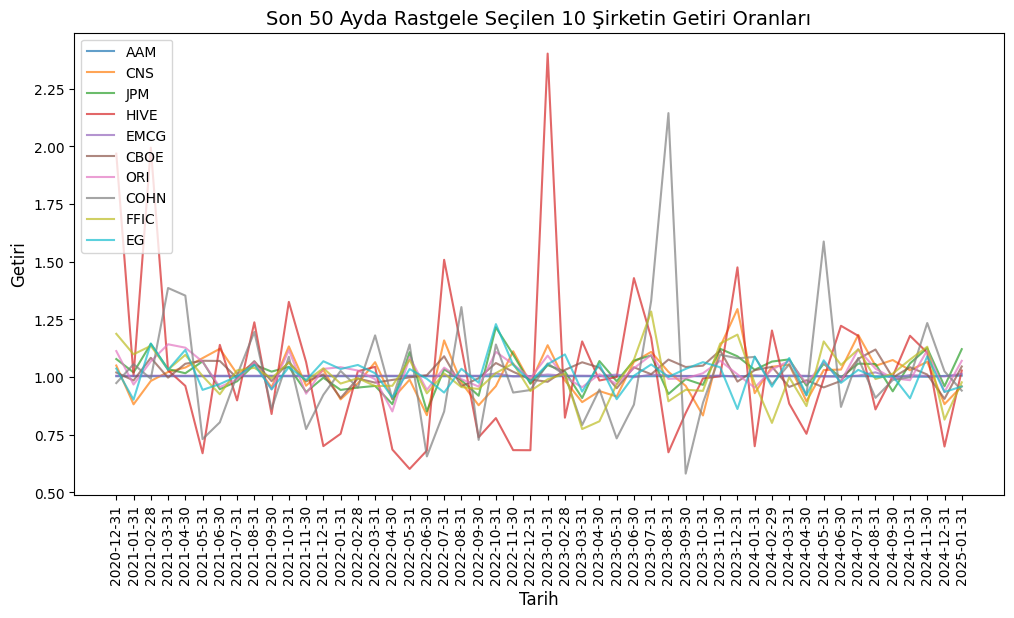

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import random


data_last_50 = data_finance_close.tail(50)

# Şirket isimlerinden rastgele 10 tane seç
random_companies = random.sample(list(data_last_50.columns[1:]), 10)  # İlk sütun 'Date' olduğundan [1:]


plt.figure(figsize=(12, 6))

# Rastgele seçilen 10 şirketin verilerini çiz
for ticker in random_companies:
    plt.plot(data_last_50["Date"], data_last_50[ticker], label=ticker, alpha=0.7)


plt.title("Son 50 Ayda Rastgele Seçilen 10 Şirketin Getiri Oranları", fontsize=14)
plt.xlabel("Tarih", fontsize=12)
plt.ylabel("Getiri", fontsize=12)


plt.xticks(rotation=90)

# (Açıklama kutusu)
plt.legend(loc='upper left')


plt.show()


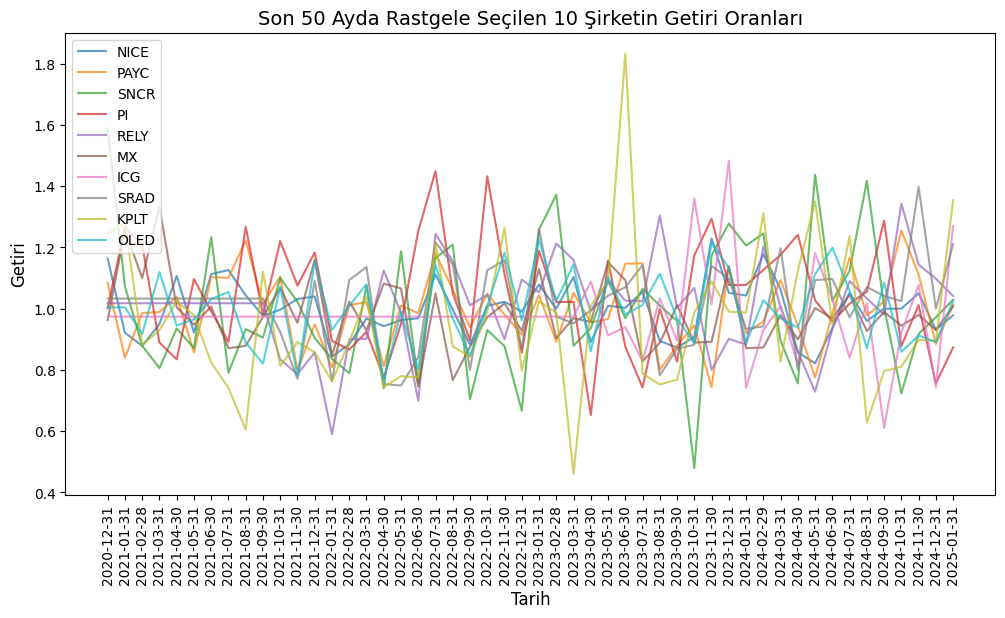

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import random


data_last_50 = data_technology_close.tail(50)

# Şirket isimlerinden rastgele 10 tane seç
random_companies = random.sample(list(data_last_50.columns[1:]), 10)  # İlk sütun 'Date' olduğundan [1:]


plt.figure(figsize=(12, 6))

# Rastgele seçilen 10 şirketin verilerini çiz
for ticker in random_companies:
    plt.plot(data_last_50["Date"], data_last_50[ticker], label=ticker, alpha=0.7)


plt.title("Son 50 Ayda Rastgele Seçilen 10 Şirketin Getiri Oranları", fontsize=14)
plt.xlabel("Tarih", fontsize=12)
plt.ylabel("Getiri", fontsize=12)


plt.xticks(rotation=90)

# (Açıklama kutusu)
plt.legend(loc='upper left')


plt.show()


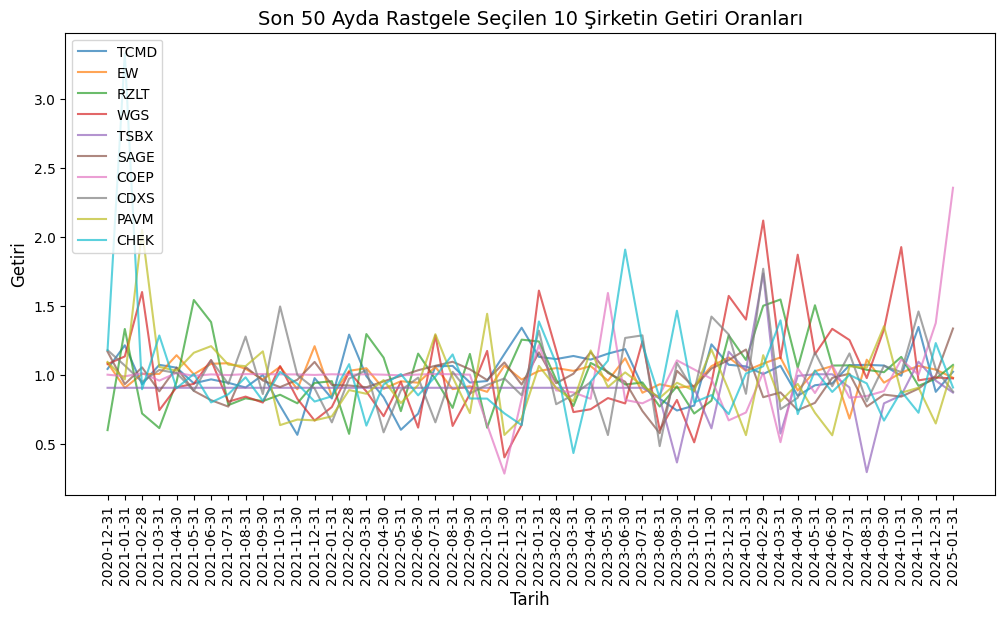

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import random


data_last_50 = data_healthcare_close.tail(50)

# Şirket isimlerinden rastgele 10 tane seç
random_companies = random.sample(list(data_last_50.columns[1:]), 10)  # İlk sütun 'Date' olduğundan [1:]


plt.figure(figsize=(12, 6))

# Rastgele seçilen 10 şirketin verilerini çiz
for ticker in random_companies:
    plt.plot(data_last_50["Date"], data_last_50[ticker], label=ticker, alpha=0.7)


plt.title("Son 50 Ayda Rastgele Seçilen 10 Şirketin Getiri Oranları", fontsize=14)
plt.xlabel("Tarih", fontsize=12)
plt.ylabel("Getiri", fontsize=12)


plt.xticks(rotation=90)

# (Açıklama kutusu)
plt.legend(loc='upper left')


plt.show()


### **3. Tsfresh kütüphanesi ile Otomatik Özellik Çıkarımı:**

Tsfresh kütüphanesi zaman serisi verisinden otomatik özellikler çıkarmak için kullanılır.

In [ ]:
!pip install PyWavelets

In [ ]:
!pip install git+https://github.com/blue-yonder/tsfresh.git

  Cloning https://github.com/blue-yonder/tsfresh.git to /tmp/pip-req-build-mo42btgm
  Running command git clone --filter=blob:none --quiet https://github.com/blue-yonder/tsfresh.git /tmp/pip-req-build-mo42btgm
  Resolved https://github.com/blue-yonder/tsfresh.git to commit fdfeaae154d4ce1444feabea97e3f24efb5b27d9
  Preparing metadata (setup.py) ... done


In [ ]:
pip install dask[dataframe]


In [ ]:
import tsfresh
from tsfresh import extract_features
from tsfresh.utilities.dataframe_functions import impute

Hisse senedi fiyatlarını içeren geniş formatlı(wide) veri, uzun fomata (long) dönüştürülmüştür.

In [ ]:
data_technology_ts = pd.melt(data_technology_close, id_vars=['Date'], value_vars=list(data_technology_close.columns), var_name="Ticker", value_name = "Value")
data_technology_ts

,Date,Ticker,Value
0,2005-01-31,AAOI,0.976636
1,2005-02-28,AAOI,0.976636
2,2005-03-31,AAOI,0.976636
3,2005-04-30,AAOI,0.976636
4,2005-05-31,AAOI,0.976636
...,...,...,...
184842,2024-09-30,ZUO,0.980660
184843,2024-10-31,ZUO,1.148492
184844,2024-11-30,ZUO,1.003030
184845,2024-12-31,ZUO,0.998993


In [ ]:
data_finance_ts = pd.melt(data_finance_close, id_vars=['Date'], value_vars=list(data_finance_close.columns), var_name="Ticker", value_name = "Value")
data_finance_ts

,Date,Ticker,Value
0,2005-01-31,AACT,1.003910
1,2005-02-28,AACT,1.003910
2,2005-03-31,AACT,1.003910
3,2005-04-30,AACT,1.003910
4,2005-05-31,AACT,1.003910
...,...,...,...
206291,2024-09-30,ZION,0.952785
206292,2024-10-31,ZION,1.102499
206293,2024-11-30,ZION,1.170867
206294,2024-12-31,ZION,0.896398


In [ ]:
data_healthcare_ts = pd.melt(data_healthcare_close, id_vars=['Date'], value_vars=list(data_healthcare_close.columns), var_name="Ticker", value_name = "Value")
data_healthcare_ts

,Date,Ticker,Value
0,2005-01-31,A,1.012237
1,2005-02-28,A,1.085482
2,2005-03-31,A,0.925000
3,2005-04-30,A,0.934685
4,2005-05-31,A,1.157109
...,...,...,...
277868,2024-09-30,ZYXI,1.038168
277869,2024-10-31,ZYXI,1.057598
277870,2024-11-30,ZYXI,0.964079
277871,2024-12-31,ZYXI,0.962740


In [ ]:
data_healthcare_ex = tsfresh.extract_features(
    data_healthcare_ts,  # Zaman serisi verisi
    column_id="Ticker",  # Ticker id'sine göre gruplama
    column_sort="Date",  # Tarihe göre sıralama
    column_value="Value",  # Zaman serisi değeri
    default_fc_parameters=ComprehensiveFCParameters()  # Daha kapsamlı parametre seti
)


Feature Extraction: 100%|██████████| 1153/1153 [03:57<00:00,  4.85it/s]


Sektörlerin zaman serisi verileri,


*   Her hisse senedi için ayrı özellikler çıkarmak amacıyla veriyi hisse senedi koduna (Ticker) göre gruplanır.
*   Tarih sütununa göre sıralama yaparak zaman serisi ilişkisini korunur.

*   Zaman serisi değerleri olarak kapanış fiyatları (Value) kullanılır.
*   Tsfresh'in kapsamlı özellik çıkarma parametreleri kullanılarak
Ortalama, varyans, trend, Fourier dönüşümü, otokorelasyon gibi detaylı istatistiksel ve zaman serisi özellikleri üretilir.

In [ ]:
data_healthcare_ex

,Unnamed: 0,Value__variance_larger_than_standard_deviation,Value__has_duplicate_max,Value__has_duplicate_min,Value__has_duplicate,Value__sum_values,Value__abs_energy,Value__mean_abs_change,Value__mean_change,Value__mean_second_derivative_central,...,Value__fourier_entropy__bins_5,Value__fourier_entropy__bins_10,Value__fourier_entropy__bins_100,Value__permutation_entropy__dimension_3__tau_1,Value__permutation_entropy__dimension_4__tau_1,Value__permutation_entropy__dimension_5__tau_1,Value__permutation_entropy__dimension_6__tau_1,Value__permutation_entropy__dimension_7__tau_1,Value__query_similarity_count__query_None__threshold_0.0,Value__mean_n_absolute_max__number_of_maxima_7
0,A,0.0,0.0,0.0,0.0,244.292453,249.313561,0.091816,0.000482,0.000166,...,1.077833,1.729474,3.688620,1.787811,3.132251,4.533767,5.225872,5.412393,NaN,1.218149
1,AADI,0.0,0.0,0.0,1.0,235.484989,234.914014,0.090541,-0.000236,-0.000911,...,1.353501,2.028447,3.951278,1.073090,1.656802,2.048215,2.159384,2.178550,NaN,1.506112
2,ABBV,0.0,0.0,0.0,1.0,245.047641,249.917653,0.049975,0.000119,0.000153,...,0.916596,1.578008,3.528038,1.518943,2.513162,3.331087,3.636485,3.712827,NaN,1.179232
3,ABCL,0.0,0.0,0.0,1.0,230.751807,222.287786,0.043333,0.000525,0.000227,...,1.349164,2.010526,3.899982,0.669516,1.004216,1.214790,1.292429,1.296959,NaN,1.236549
4,ABEO,0.0,0.0,0.0,1.0,241.437602,261.926062,0.279396,0.000168,-0.000009,...,0.725090,1.385141,3.334175,1.777195,3.110625,4.471272,5.257460,5.418292,NaN,2.047763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1148,ZURA,0.0,0.0,0.0,1.0,231.386785,223.891988,0.032633,-0.000871,-0.000142,...,1.434580,2.068350,3.915539,0.432685,0.548696,0.590113,0.598074,0.600202,NaN,1.270572
1149,ZVRA,0.0,0.0,0.0,1.0,237.890682,241.558179,0.124570,-0.000137,0.000097,...,1.140747,1.781504,3.743429,1.325229,2.059597,2.697772,2.938141,2.997212,NaN,1.589435
1150,ZVSA,0.0,0.0,0.0,1.0,211.008331,187.971539,0.039305,0.001809,0.000679,...,1.488268,2.162379,3.990678,0.514817,0.780281,0.887840,0.920315,0.923567,NaN,1.233406
1151,ZYME,0.0,0.0,0.0,1.0,245.164929,252.246384,0.070844,-0.000087,-0.000087,...,1.455290,2.134806,4.045967,1.155284,1.812866,2.270366,2.422879,2.459102,NaN,1.399126


In [ ]:

from tsfresh.feature_extraction import ComprehensiveFCParameters

# Veriyi ayırıyoruz ve daha kapsamlı bir parametre seti kullanıyoruz
data_technology_ex = tsfresh.extract_features(
    data_technology_ts,  # Zaman serisi verisi
    column_id="Ticker",  # Ticker id'sine göre gruplama
    column_sort="Date",  # Tarihe göre sıralama
    column_value="Value",  # Zaman serisi değeri
    default_fc_parameters=ComprehensiveFCParameters()  # Daha kapsamlı parametre seti
)




Feature Extraction: 100%|██████████| 767/767 [02:45<00:00,  4.63it/s]


In [ ]:
data_technology_ex

,Unnamed: 0,Value__variance_larger_than_standard_deviation,Value__has_duplicate_max,Value__has_duplicate_min,Value__has_duplicate,Value__sum_values,Value__abs_energy,Value__mean_abs_change,Value__mean_change,Value__mean_second_derivative_central,...,Value__fourier_entropy__bins_5,Value__fourier_entropy__bins_10,Value__fourier_entropy__bins_100,Value__permutation_entropy__dimension_3__tau_1,Value__permutation_entropy__dimension_4__tau_1,Value__permutation_entropy__dimension_5__tau_1,Value__permutation_entropy__dimension_6__tau_1,Value__permutation_entropy__dimension_7__tau_1,Value__query_similarity_count__query_None__threshold_0.0,Value__mean_n_absolute_max__number_of_maxima_7
0,AAOI,0.0,0.0,0.0,1.0,244.428096,261.294822,0.176237,-0.000913,-0.000286,...,0.922444,1.541429,3.432300,1.428450,2.317827,3.105979,3.441724,3.499939,NaN,1.993344
1,AAPL,0.0,0.0,0.0,0.0,247.379390,255.846926,0.095931,-0.000369,-0.000520,...,1.190219,1.866337,3.798294,1.789904,3.143532,4.525464,5.222215,5.424191,NaN,1.209552
2,ACIW,0.0,0.0,0.0,0.0,243.967771,248.850213,0.096799,0.000101,0.000051,...,0.625135,1.241988,3.285007,1.780425,3.140193,4.539955,5.265551,5.435989,NaN,1.231578
3,ACLS,0.0,0.0,0.0,1.0,245.547560,256.860056,0.174901,-0.000137,-0.000237,...,1.270387,1.905683,3.777468,1.786250,3.148271,4.551437,5.330167,5.441888,NaN,1.442950
4,ACMR,0.0,0.0,0.0,1.0,246.070917,256.826103,0.102928,0.001491,0.001009,...,1.319961,1.963679,3.848686,1.114406,1.719425,2.142711,2.249735,2.280971,NaN,1.651256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762,ZETA,0.0,0.0,0.0,1.0,247.824155,256.167425,0.031452,-0.000029,0.000367,...,1.511481,2.165345,4.024917,0.607518,0.927826,1.106971,1.160022,1.164100,NaN,1.307488
763,ZI,0.0,0.0,0.0,1.0,237.995314,236.087779,0.041132,-0.000043,0.000038,...,1.009439,1.693185,3.631483,0.827005,1.209672,1.402976,1.465101,1.482002,NaN,1.215171
764,ZM,0.0,0.0,0.0,1.0,242.174237,244.937778,0.041388,0.000266,0.000164,...,1.059291,1.636767,3.569502,0.890872,1.371568,1.669743,1.766806,1.796496,NaN,1.343149
765,ZS,0.0,0.0,0.0,1.0,248.217366,257.603206,0.058704,0.000400,0.000522,...,1.218680,1.821166,3.781236,1.085164,1.633683,2.006588,2.116168,2.146976,NaN,1.359384


In [ ]:
from tsfresh.feature_extraction import ComprehensiveFCParameters

# Finance verisi için özellik çıkarma
data_finance_ex = tsfresh.extract_features(
    data_finance_ts,  # Zaman serisi verisi
    column_id="Ticker",  # Ticker id'sine göre gruplama
    column_sort="Date",  # Tarihe göre sıralama
    column_value="Value",  # Zaman serisi değeri
    default_fc_parameters=ComprehensiveFCParameters()  # Daha kapsamlı parametre seti
)

Feature Extraction: 100%|██████████| 856/856 [03:07<00:00,  4.57it/s]


In [ ]:
data_finance_ex

,Unnamed: 0,Value__variance_larger_than_standard_deviation,Value__has_duplicate_max,Value__has_duplicate_min,Value__has_duplicate,Value__sum_values,Value__abs_energy,Value__mean_abs_change,Value__mean_change,Value__mean_second_derivative_central,...,Value__fourier_entropy__bins_5,Value__fourier_entropy__bins_10,Value__fourier_entropy__bins_100,Value__permutation_entropy__dimension_3__tau_1,Value__permutation_entropy__dimension_4__tau_1,Value__permutation_entropy__dimension_5__tau_1,Value__permutation_entropy__dimension_6__tau_1,Value__permutation_entropy__dimension_7__tau_1,Value__query_similarity_count__query_None__threshold_0.0,Value__mean_n_absolute_max__number_of_maxima_7
0,AACT,0.0,0.0,0.0,1.0,241.949097,242.901997,0.000181,-0.000005,-0.000008,...,0.095661,0.095661,0.468209,0.370304,0.487921,0.515233,0.517062,0.518904,NaN,1.006349
1,AAM,0.0,0.0,0.0,1.0,241.839983,242.682911,0.000031,0.000010,0.000002,...,0.694926,1.135536,2.946144,0.081215,0.108636,0.109022,0.109412,0.109805,NaN,1.004049
2,AAME,0.0,0.0,0.0,1.0,242.492880,248.097374,0.120012,0.000406,0.000197,...,0.979105,1.619742,3.610842,1.790262,3.138071,4.454376,5.233963,5.412393,NaN,1.432002
3,AAMI,0.0,0.0,0.0,1.0,243.996697,248.527848,0.062646,-0.000283,0.000211,...,1.140407,1.802071,3.715435,1.443788,2.202747,2.783418,3.039297,3.130303,NaN,1.251026
4,AB,0.0,0.0,0.0,0.0,243.447859,247.871819,0.090030,0.000270,0.000017,...,0.928339,1.493015,3.519666,1.784435,3.127376,4.467528,5.202376,5.394695,NaN,1.209129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
851,YOTA,0.0,0.0,0.0,1.0,242.122484,243.256774,0.001835,0.000163,0.000085,...,0.095661,0.095661,1.749703,0.517903,0.755109,0.831230,0.840031,0.843005,NaN,1.025576
852,YRD,0.0,0.0,0.0,1.0,240.734482,247.250243,0.104836,0.000840,0.000479,...,1.119954,1.804143,3.750338,1.248438,2.043911,2.629043,2.827632,2.860616,NaN,1.729177
853,ZBAI,0.0,0.0,0.0,1.0,231.007402,236.321548,0.083337,0.000536,-0.001230,...,0.576622,1.185031,3.288694,0.970153,1.453737,1.737631,1.810390,1.822543,NaN,1.859651
854,ZBAO,0.0,0.0,0.0,1.0,226.600057,213.425065,0.010246,0.000249,0.000940,...,0.919632,1.160224,3.177089,0.198818,0.216984,0.217755,0.218532,0.219315,NaN,1.036871


In [ ]:
data_finance_ex.to_csv("/content/sample_data/Downloads/data_finance_ex.csv")
data_technology_ex.to_csv("/content/sample_data/Downloads/data_technology_ex.csv")
data_healthcare_ex.to_csv("/content/sample_data/Downloads/data_healthcare_ex.csv")

In [ ]:
data_finance_ex=pd.read_csv('/content/sample_data/Downloads/data_finance_ex.csv')
data_technology_ex=pd.read_csv('/content/sample_data/Downloads/data_technology_ex.csv')
data_healthcare_ex=pd.read_csv('/content/sample_data/Downloads/data_healthcare_ex.csv')

In [ ]:
data_healthcare_ex.columns

Index(['Unnamed: 0', 'Value__variance_larger_than_standard_deviation',
       'Value__has_duplicate_max', 'Value__has_duplicate_min',
       'Value__has_duplicate', 'Value__sum_values', 'Value__abs_energy',
       'Value__mean_abs_change', 'Value__mean_change',
       'Value__mean_second_derivative_central',
       ...
       'Value__fourier_entropy__bins_5', 'Value__fourier_entropy__bins_10',
       'Value__fourier_entropy__bins_100',
       'Value__permutation_entropy__dimension_3__tau_1',
       'Value__permutation_entropy__dimension_4__tau_1',
       'Value__permutation_entropy__dimension_5__tau_1',
       'Value__permutation_entropy__dimension_6__tau_1',
       'Value__permutation_entropy__dimension_7__tau_1',
       'Value__query_similarity_count__query_None__threshold_0.0',
       'Value__mean_n_absolute_max__number_of_maxima_7'],
      dtype='object', length=784)

In [ ]:
data_healthcare_ex['Unnamed: 0']

,Unnamed: 0
0,A
1,AADI
2,ABBV
3,ABCL
4,ABEO
...,...
1148,ZURA
1149,ZVRA
1150,ZVSA
1151,ZYME


In [ ]:
data_healthcare_ex = data_healthcare_ex.rename(columns={'Unnamed: 0': 'Ticker'})

In [ ]:
data_finance_ex = data_finance_ex.rename(columns={'Unnamed: 0': 'Ticker'})


In [ ]:
data_technology_ex = data_technology_ex.rename(columns={'Unnamed: 0': 'Ticker'})

In [ ]:
data_finance_ex

,Ticker,Value__variance_larger_than_standard_deviation,Value__has_duplicate_max,Value__has_duplicate_min,Value__has_duplicate,Value__sum_values,Value__abs_energy,Value__mean_abs_change,Value__mean_change,Value__mean_second_derivative_central,...,Value__fourier_entropy__bins_5,Value__fourier_entropy__bins_10,Value__fourier_entropy__bins_100,Value__permutation_entropy__dimension_3__tau_1,Value__permutation_entropy__dimension_4__tau_1,Value__permutation_entropy__dimension_5__tau_1,Value__permutation_entropy__dimension_6__tau_1,Value__permutation_entropy__dimension_7__tau_1,Value__query_similarity_count__query_None__threshold_0.0,Value__mean_n_absolute_max__number_of_maxima_7
0,AACT,0.0,0.0,0.0,1.0,241.949097,242.901997,0.000181,-0.000005,-0.000008,...,0.095661,0.095661,0.468209,0.370304,0.487921,0.515233,0.517062,0.518904,NaN,1.006349
1,AAM,0.0,0.0,0.0,1.0,241.839983,242.682911,0.000031,0.000010,0.000002,...,0.694926,1.135536,2.946144,0.081215,0.108636,0.109022,0.109412,0.109805,NaN,1.004049
2,AAME,0.0,0.0,0.0,1.0,242.492880,248.097374,0.120012,0.000406,0.000197,...,0.979105,1.619742,3.610842,1.790262,3.138071,4.454376,5.233963,5.412393,NaN,1.432002
3,AAMI,0.0,0.0,0.0,1.0,243.996697,248.527848,0.062646,-0.000283,0.000211,...,1.140407,1.802071,3.715435,1.443788,2.202747,2.783418,3.039297,3.130303,NaN,1.251026
4,AB,0.0,0.0,0.0,0.0,243.447859,247.871819,0.090030,0.000270,0.000017,...,0.928339,1.493015,3.519666,1.784435,3.127376,4.467528,5.202376,5.394695,NaN,1.209129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
851,YOTA,0.0,0.0,0.0,1.0,242.122484,243.256774,0.001835,0.000163,0.000085,...,0.095661,0.095661,1.749703,0.517903,0.755109,0.831230,0.840031,0.843005,NaN,1.025576
852,YRD,0.0,0.0,0.0,1.0,240.734482,247.250243,0.104836,0.000840,0.000479,...,1.119954,1.804143,3.750338,1.248438,2.043911,2.629043,2.827632,2.860616,NaN,1.729177
853,ZBAI,0.0,0.0,0.0,1.0,231.007402,236.321548,0.083337,0.000536,-0.001230,...,0.576622,1.185031,3.288694,0.970153,1.453737,1.737631,1.810390,1.822543,NaN,1.859651
854,ZBAO,0.0,0.0,0.0,1.0,226.600057,213.425065,0.010246,0.000249,0.000940,...,0.919632,1.160224,3.177089,0.198818,0.216984,0.217755,0.218532,0.219315,NaN,1.036871


In [ ]:
data_technology_ex.columns

Index(['Ticker', 'Value__variance_larger_than_standard_deviation',
       'Value__has_duplicate_max', 'Value__has_duplicate_min',
       'Value__has_duplicate', 'Value__sum_values', 'Value__abs_energy',
       'Value__mean_abs_change', 'Value__mean_change',
       'Value__mean_second_derivative_central',
       ...
       'Value__fourier_entropy__bins_5', 'Value__fourier_entropy__bins_10',
       'Value__fourier_entropy__bins_100',
       'Value__permutation_entropy__dimension_3__tau_1',
       'Value__permutation_entropy__dimension_4__tau_1',
       'Value__permutation_entropy__dimension_5__tau_1',
       'Value__permutation_entropy__dimension_6__tau_1',
       'Value__permutation_entropy__dimension_7__tau_1',
       'Value__query_similarity_count__query_None__threshold_0.0',
       'Value__mean_n_absolute_max__number_of_maxima_7'],
      dtype='object', length=784)

In [ ]:
data_healthcare_ex

,Ticker,Value__variance_larger_than_standard_deviation,Value__has_duplicate_max,Value__has_duplicate_min,Value__has_duplicate,Value__sum_values,Value__abs_energy,Value__mean_abs_change,Value__mean_change,Value__mean_second_derivative_central,...,Value__fourier_entropy__bins_5,Value__fourier_entropy__bins_10,Value__fourier_entropy__bins_100,Value__permutation_entropy__dimension_3__tau_1,Value__permutation_entropy__dimension_4__tau_1,Value__permutation_entropy__dimension_5__tau_1,Value__permutation_entropy__dimension_6__tau_1,Value__permutation_entropy__dimension_7__tau_1,Value__query_similarity_count__query_None__threshold_0.0,Value__mean_n_absolute_max__number_of_maxima_7
0,A,0.0,0.0,0.0,0.0,244.292453,249.313561,0.091816,0.000482,0.000166,...,1.077833,1.729474,3.688620,1.787811,3.132251,4.533767,5.225872,5.412393,NaN,1.218149
1,AADI,0.0,0.0,0.0,1.0,235.484989,234.914014,0.090541,-0.000236,-0.000911,...,1.353501,2.028447,3.951278,1.073090,1.656802,2.048215,2.159384,2.178550,NaN,1.506112
2,ABBV,0.0,0.0,0.0,1.0,245.047641,249.917653,0.049975,0.000119,0.000153,...,0.916596,1.578008,3.528038,1.518943,2.513162,3.331087,3.636485,3.712827,NaN,1.179232
3,ABCL,0.0,0.0,0.0,1.0,230.751807,222.287786,0.043333,0.000525,0.000227,...,1.349164,2.010526,3.899982,0.669516,1.004216,1.214790,1.292429,1.296959,NaN,1.236549
4,ABEO,0.0,0.0,0.0,1.0,241.437602,261.926062,0.279396,0.000168,-0.000009,...,0.725090,1.385141,3.334175,1.777195,3.110625,4.471272,5.257460,5.418292,NaN,2.047763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1148,ZURA,0.0,0.0,0.0,1.0,231.386785,223.891988,0.032633,-0.000871,-0.000142,...,1.434580,2.068350,3.915539,0.432685,0.548696,0.590113,0.598074,0.600202,NaN,1.270572
1149,ZVRA,0.0,0.0,0.0,1.0,237.890682,241.558179,0.124570,-0.000137,0.000097,...,1.140747,1.781504,3.743429,1.325229,2.059597,2.697772,2.938141,2.997212,NaN,1.589435
1150,ZVSA,0.0,0.0,0.0,1.0,211.008331,187.971539,0.039305,0.001809,0.000679,...,1.488268,2.162379,3.990678,0.514817,0.780281,0.887840,0.920315,0.923567,NaN,1.233406
1151,ZYME,0.0,0.0,0.0,1.0,245.164929,252.246384,0.070844,-0.000087,-0.000087,...,1.455290,2.134806,4.045967,1.155284,1.812866,2.270366,2.422879,2.459102,NaN,1.399126


### **4.Verilerin Birleştirilmesi:**

Makine öğrenmesi işlemlerini kolaylaştırmak için 3 büyük sektöre ait veri setleri bir veri setinde birleştirilir.

Veri setleri birleştirilmeden önce 3 tabloya da ayrı ayrı sektör ismini belirten sütunlar eklenir.

In [ ]:
data_technology_ex["sectorType"] = "Technology"
data_finance_ex["sectorType"] = "Finance"
data_healthcare_ex["sectorType"] = "Healthcare"

In [ ]:
data_sum = pd.concat([data_technology_ex, data_healthcare_ex, data_finance_ex], ignore_index=True)

In [ ]:
data_sum

,Ticker,Value__variance_larger_than_standard_deviation,Value__has_duplicate_max,Value__has_duplicate_min,Value__has_duplicate,Value__sum_values,Value__abs_energy,Value__mean_abs_change,Value__mean_change,Value__mean_second_derivative_central,...,Value__fourier_entropy__bins_10,Value__fourier_entropy__bins_100,Value__permutation_entropy__dimension_3__tau_1,Value__permutation_entropy__dimension_4__tau_1,Value__permutation_entropy__dimension_5__tau_1,Value__permutation_entropy__dimension_6__tau_1,Value__permutation_entropy__dimension_7__tau_1,Value__query_similarity_count__query_None__threshold_0.0,Value__mean_n_absolute_max__number_of_maxima_7,sectorType
0,AAOI,0.0,0.0,0.0,1.0,244.428096,261.294822,0.176237,-0.000913,-0.000286,...,1.541429,3.432300,1.428450,2.317827,3.105979,3.441724,3.499939,NaN,1.993344,Technology
1,AAPL,0.0,0.0,0.0,0.0,247.379390,255.846926,0.095931,-0.000369,-0.000520,...,1.866337,3.798294,1.789904,3.143532,4.525464,5.222215,5.424191,NaN,1.209552,Technology
2,ACIW,0.0,0.0,0.0,0.0,243.967771,248.850213,0.096799,0.000101,0.000051,...,1.241988,3.285007,1.780425,3.140193,4.539955,5.265551,5.435989,NaN,1.231578,Technology
3,ACLS,0.0,0.0,0.0,1.0,245.547560,256.860056,0.174901,-0.000137,-0.000237,...,1.905683,3.777468,1.786250,3.148271,4.551437,5.330167,5.441888,NaN,1.442950,Technology
4,ACMR,0.0,0.0,0.0,1.0,246.070917,256.826103,0.102928,0.001491,0.001009,...,1.963679,3.848686,1.114406,1.719425,2.142711,2.249735,2.280971,NaN,1.651256,Technology
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2771,YOTA,0.0,0.0,0.0,1.0,242.122484,243.256774,0.001835,0.000163,0.000085,...,0.095661,1.749703,0.517903,0.755109,0.831230,0.840031,0.843005,NaN,1.025576,Finance
2772,YRD,0.0,0.0,0.0,1.0,240.734482,247.250243,0.104836,0.000840,0.000479,...,1.804143,3.750338,1.248438,2.043911,2.629043,2.827632,2.860616,NaN,1.729177,Finance
2773,ZBAI,0.0,0.0,0.0,1.0,231.007402,236.321548,0.083337,0.000536,-0.001230,...,1.185031,3.288694,0.970153,1.453737,1.737631,1.810390,1.822543,NaN,1.859651,Finance
2774,ZBAO,0.0,0.0,0.0,1.0,226.600057,213.425065,0.010246,0.000249,0.000940,...,1.160224,3.177089,0.198818,0.216984,0.217755,0.218532,0.219315,NaN,1.036871,Finance


In [ ]:
data_sum.isna().sum()

,0
Ticker,0
Value__variance_larger_than_standard_deviation,0
Value__has_duplicate_max,0
Value__has_duplicate_min,0
Value__has_duplicate,0
...,...
Value__permutation_entropy__dimension_6__tau_1,0
Value__permutation_entropy__dimension_7__tau_1,0
Value__query_similarity_count__query_None__threshold_0.0,2776
Value__mean_n_absolute_max__number_of_maxima_7,0


In [ ]:
data_sum.dropna(how="all",axis=1,inplace=True)
data_sum.isna().sum()

,0
Ticker,0
Value__variance_larger_than_standard_deviation,0
Value__has_duplicate_max,0
Value__has_duplicate_min,0
Value__has_duplicate,0
...,...
Value__permutation_entropy__dimension_5__tau_1,0
Value__permutation_entropy__dimension_6__tau_1,0
Value__permutation_entropy__dimension_7__tau_1,0
Value__mean_n_absolute_max__number_of_maxima_7,0


In [ ]:
data_sum.reset_index(drop=True, inplace=True)
data_sum

,Ticker,Value__variance_larger_than_standard_deviation,Value__has_duplicate_max,Value__has_duplicate_min,Value__has_duplicate,Value__sum_values,Value__abs_energy,Value__mean_abs_change,Value__mean_change,Value__mean_second_derivative_central,...,Value__fourier_entropy__bins_5,Value__fourier_entropy__bins_10,Value__fourier_entropy__bins_100,Value__permutation_entropy__dimension_3__tau_1,Value__permutation_entropy__dimension_4__tau_1,Value__permutation_entropy__dimension_5__tau_1,Value__permutation_entropy__dimension_6__tau_1,Value__permutation_entropy__dimension_7__tau_1,Value__mean_n_absolute_max__number_of_maxima_7,sectorType
0,AAOI,0.0,0.0,0.0,1.0,244.428096,261.294822,0.176237,-0.000913,-0.000286,...,0.922444,1.541429,3.432300,1.428450,2.317827,3.105979,3.441724,3.499939,1.993344,Technology
1,AAPL,0.0,0.0,0.0,0.0,247.379390,255.846926,0.095931,-0.000369,-0.000520,...,1.190219,1.866337,3.798294,1.789904,3.143532,4.525464,5.222215,5.424191,1.209552,Technology
2,ACIW,0.0,0.0,0.0,0.0,243.967771,248.850213,0.096799,0.000101,0.000051,...,0.625135,1.241988,3.285007,1.780425,3.140193,4.539955,5.265551,5.435989,1.231578,Technology
3,ACLS,0.0,0.0,0.0,1.0,245.547560,256.860056,0.174901,-0.000137,-0.000237,...,1.270387,1.905683,3.777468,1.786250,3.148271,4.551437,5.330167,5.441888,1.442950,Technology
4,ACMR,0.0,0.0,0.0,1.0,246.070917,256.826103,0.102928,0.001491,0.001009,...,1.319961,1.963679,3.848686,1.114406,1.719425,2.142711,2.249735,2.280971,1.651256,Technology
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2771,YOTA,0.0,0.0,0.0,1.0,242.122484,243.256774,0.001835,0.000163,0.000085,...,0.095661,0.095661,1.749703,0.517903,0.755109,0.831230,0.840031,0.843005,1.025576,Finance
2772,YRD,0.0,0.0,0.0,1.0,240.734482,247.250243,0.104836,0.000840,0.000479,...,1.119954,1.804143,3.750338,1.248438,2.043911,2.629043,2.827632,2.860616,1.729177,Finance
2773,ZBAI,0.0,0.0,0.0,1.0,231.007402,236.321548,0.083337,0.000536,-0.001230,...,0.576622,1.185031,3.288694,0.970153,1.453737,1.737631,1.810390,1.822543,1.859651,Finance
2774,ZBAO,0.0,0.0,0.0,1.0,226.600057,213.425065,0.010246,0.000249,0.000940,...,0.919632,1.160224,3.177089,0.198818,0.216984,0.217755,0.218532,0.219315,1.036871,Finance


### **5.Veri Miktarlarının Eşitlenmesi:**

Veri miktarlarının eşitsizliği model eğitiminde başarısızlığa yol açacağı için RandomOverSampler kütüphanesi kullanılarak veri miktarları eşitlenir. Alternatif olarak projenin başında veriler çekilirken belirli bir sayıda veri çekilebilir:



In [ ]:
 #import random
 #randomdatafinance = random.sample(datafinance,500) #örneğin her sektörden 500 veri
 #data_finance = yfinance.download(randomdatafinance, start='2005-01-01')
 #data_finance_close= data_finance['Adj Close'].resample('ME').last().pct_change()+1

<Axes: xlabel='Siniflar', ylabel='Miktar'>

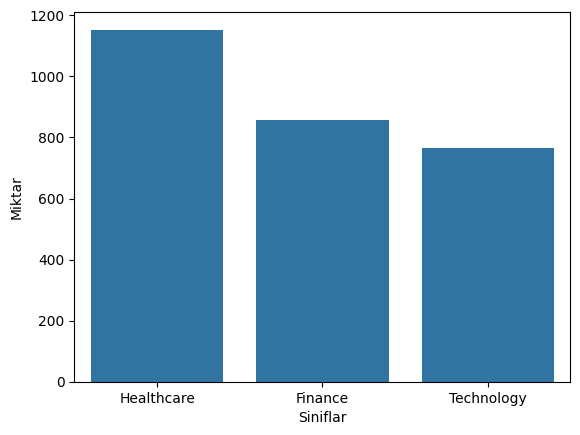

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
df_graph = pd.DataFrame({
    "Siniflar" : data_sum["sectorType"].value_counts().index,
    "Miktar": data_sum["sectorType"].value_counts().values
})
fig, ax = plt.subplots()
sns.barplot(data=df_graph, x="Siniflar", y="Miktar")

In [ ]:
from imblearn.over_sampling import RandomOverSampler

X = data_sum.drop(["sectorType"], axis=1)
y = data_sum["sectorType"]

sampler = RandomOverSampler()
X_resampled, y_resampled = sampler.fit_resample(X, y)

data_sum = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=["sectorType"])], axis=1)

<Axes: xlabel='Siniflar', ylabel='Miktar'>

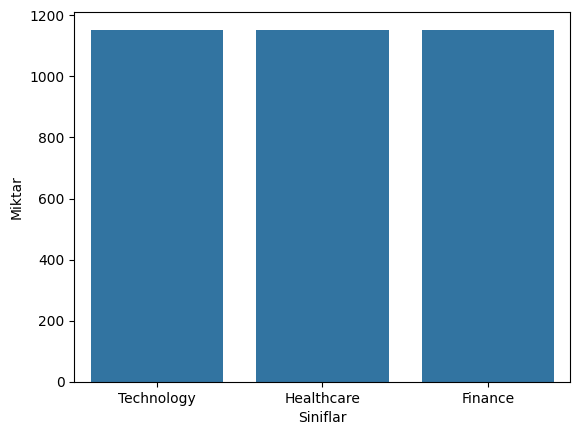

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
df_graph = pd.DataFrame({
    "Siniflar" : data_sum["sectorType"].value_counts().index,
    "Miktar": data_sum["sectorType"].value_counts().values
})
fig, ax = plt.subplots()
sns.barplot(data=df_graph, x="Siniflar", y="Miktar")

In [ ]:
data_sum

,Ticker,Value__variance_larger_than_standard_deviation,Value__has_duplicate_max,Value__has_duplicate_min,Value__has_duplicate,Value__sum_values,Value__abs_energy,Value__mean_abs_change,Value__mean_change,Value__mean_second_derivative_central,...,Value__fourier_entropy__bins_5,Value__fourier_entropy__bins_10,Value__fourier_entropy__bins_100,Value__permutation_entropy__dimension_3__tau_1,Value__permutation_entropy__dimension_4__tau_1,Value__permutation_entropy__dimension_5__tau_1,Value__permutation_entropy__dimension_6__tau_1,Value__permutation_entropy__dimension_7__tau_1,Value__mean_n_absolute_max__number_of_maxima_7,sectorType
0,AAOI,0.0,0.0,0.0,1.0,244.428096,261.294822,0.176237,-0.000913,-0.000286,...,0.922444,1.541429,3.432300,1.428450,2.317827,3.105979,3.441724,3.499939,1.993344,Technology
1,AAPL,0.0,0.0,0.0,0.0,247.379390,255.846926,0.095931,-0.000369,-0.000520,...,1.190219,1.866337,3.798294,1.789904,3.143532,4.525464,5.222215,5.424191,1.209552,Technology
2,ACIW,0.0,0.0,0.0,0.0,243.967771,248.850213,0.096799,0.000101,0.000051,...,0.625135,1.241988,3.285007,1.780425,3.140193,4.539955,5.265551,5.435989,1.231578,Technology
3,ACLS,0.0,0.0,0.0,1.0,245.547560,256.860056,0.174901,-0.000137,-0.000237,...,1.270387,1.905683,3.777468,1.786250,3.148271,4.551437,5.330167,5.441888,1.442950,Technology
4,ACMR,0.0,0.0,0.0,1.0,246.070917,256.826103,0.102928,0.001491,0.001009,...,1.319961,1.963679,3.848686,1.114406,1.719425,2.142711,2.249735,2.280971,1.651256,Technology
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3454,MU,0.0,0.0,0.0,1.0,245.178422,253.358288,0.142558,0.000318,0.000265,...,0.584877,1.106198,3.145511,1.778313,3.106781,4.510633,5.228089,5.435989,1.326223,Technology
3455,BNAI,0.0,0.0,0.0,1.0,239.724771,241.957762,0.027775,-0.002549,-0.001671,...,0.095661,0.095661,0.095661,0.679189,1.010041,1.171520,1.207177,1.217311,1.250761,Technology
3456,LRCX,0.0,0.0,0.0,0.0,246.587153,254.588375,0.117214,0.000402,-0.000017,...,0.893763,1.496104,3.503516,1.788079,3.134437,4.495519,5.270648,5.441888,1.249755,Technology
3457,DELL,0.0,0.0,0.0,1.0,247.299175,254.579215,0.041501,-0.000516,-0.000001,...,1.061088,1.692922,3.642313,1.229228,1.895366,2.419953,2.609314,2.641662,1.185734,Technology


### **6.Kategorik Değişkenler ile Çalışma:**

**sectorType** sütunundaki kategorik veriy one-hot encoding yöntemiyle sayısal verilere dönüştürülür. One-hot encoding, her kategorik değeri yeni bir sütun olarak temsil eden bir tekniktir; her bir kategori, 1 veya 0 değerleri ile işaretlenir.

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
data_sum = pd.get_dummies(data_sum, columns=['sectorType'], drop_first=False)

In [ ]:
data_sum.drop("Ticker", axis=1, inplace=True)

In [ ]:
data_sum

,Value__variance_larger_than_standard_deviation,Value__has_duplicate_max,Value__has_duplicate_min,Value__has_duplicate,Value__sum_values,Value__abs_energy,Value__mean_abs_change,Value__mean_change,Value__mean_second_derivative_central,Value__median,...,Value__fourier_entropy__bins_100,Value__permutation_entropy__dimension_3__tau_1,Value__permutation_entropy__dimension_4__tau_1,Value__permutation_entropy__dimension_5__tau_1,Value__permutation_entropy__dimension_6__tau_1,Value__permutation_entropy__dimension_7__tau_1,Value__mean_n_absolute_max__number_of_maxima_7,sectorType_Finance,sectorType_Healthcare,sectorType_Technology
0,0.0,0.0,0.0,1.0,244.428096,261.294822,0.176237,-0.000913,-0.000286,0.976636,...,3.432300,1.428450,2.317827,3.105979,3.441724,3.499939,1.993344,False,False,True
1,0.0,0.0,0.0,0.0,247.379390,255.846926,0.095931,-0.000369,-0.000520,1.030927,...,3.798294,1.789904,3.143532,4.525464,5.222215,5.424191,1.209552,False,False,True
2,0.0,0.0,0.0,0.0,243.967771,248.850213,0.096799,0.000101,0.000051,1.007300,...,3.285007,1.780425,3.140193,4.539955,5.265551,5.435989,1.231578,False,False,True
3,0.0,0.0,0.0,1.0,245.547560,256.860056,0.174901,-0.000137,-0.000237,1.006098,...,3.777468,1.786250,3.148271,4.551437,5.330167,5.441888,1.442950,False,False,True
4,0.0,0.0,0.0,1.0,246.070917,256.826103,0.102928,0.001491,0.001009,1.003140,...,3.848686,1.114406,1.719425,2.142711,2.249735,2.280971,1.651256,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3454,0.0,0.0,0.0,1.0,245.178422,253.358288,0.142558,0.000318,0.000265,1.007705,...,3.145511,1.778313,3.106781,4.510633,5.228089,5.435989,1.326223,False,False,True
3455,0.0,0.0,0.0,1.0,239.724771,241.957762,0.027775,-0.002549,-0.001671,1.000944,...,0.095661,0.679189,1.010041,1.171520,1.207177,1.217311,1.250761,False,False,True
3456,0.0,0.0,0.0,0.0,246.587153,254.588375,0.117214,0.000402,-0.000017,1.025512,...,3.503516,1.788079,3.134437,4.495519,5.270648,5.441888,1.249755,False,False,True
3457,0.0,0.0,0.0,1.0,247.299175,254.579215,0.041501,-0.000516,-0.000001,1.026326,...,3.642313,1.229228,1.895366,2.419953,2.609314,2.641662,1.185734,False,False,True


In [ ]:
data_sum.to_csv("/content/sample_data/Downloads/data_sum.csv")

In [ ]:
data_sum=pd.read_csv('/content/sample_data/Downloads/data_sum.csv')

### **7.Veri Ölçeklendirme:**

Model eğitiminde doğruluk oranını artırmak için ölçekleme yapılabilir.

In [ ]:
sayisal_degiskenler = data_sum.select_dtypes(include=[np.float64, np.int64]).columns

In [ ]:
sayisal_degiskenler

Index(['Value__variance_larger_than_standard_deviation',
       'Value__has_duplicate_max', 'Value__has_duplicate_min',
       'Value__has_duplicate', 'Value__sum_values', 'Value__abs_energy',
       'Value__mean_abs_change', 'Value__mean_change',
       'Value__mean_second_derivative_central', 'Value__median',
       ...
       'Value__fourier_entropy__bins_3', 'Value__fourier_entropy__bins_5',
       'Value__fourier_entropy__bins_10', 'Value__fourier_entropy__bins_100',
       'Value__permutation_entropy__dimension_3__tau_1',
       'Value__permutation_entropy__dimension_4__tau_1',
       'Value__permutation_entropy__dimension_5__tau_1',
       'Value__permutation_entropy__dimension_6__tau_1',
       'Value__permutation_entropy__dimension_7__tau_1',
       'Value__mean_n_absolute_max__number_of_maxima_7'],
      dtype='object', length=782)

**Min-Max Scaler**: Verileri 0-1 aralığına dönüştürülmesini sağlar. Bu, veriler arasındaki ölçü farklarını ortadan kaldırır.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Min-Max Scaler'ı tanımla
scaler = MinMaxScaler()

# Sayısal değişkenleri Min-Max Scaler ile dönüştür
data_sum[sayisal_degiskenler] = scaler.fit_transform(data_sum[sayisal_degiskenler])

# Sonuçları kontrol et
print(data_sum.describe())


       Value__variance_larger_than_standard_deviation  \
count                                     3459.000000   
mean                                         0.010408   
std                                          0.101500   
min                                          0.000000   
25%                                          0.000000   
50%                                          0.000000   
75%                                          0.000000   
max                                          1.000000   

       Value__has_duplicate_max  Value__has_duplicate_min  \
count               3459.000000               3459.000000   
mean                   0.008384                  0.008095   
std                    0.091192                  0.089619   
min                    0.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                    0.000000                  0.000000   
75%                    0.000000                  0.000000  

**StandardScaler** sınıfı, veriyi z-skoru normalizasyonu ile dönüştürür. Yani her bir sayısal değişkenin ortalaması 0, standart sapması ise 1 olacak şekilde dönüştürülür.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_sum[sayisal_degiskenler] = scaler.fit_transform(data_sum[sayisal_degiskenler])


**RobustScaler,** verilerdeki outlier'ları etkisiz hale getirerek daha güvenilir bir ölçeklendirme sağlar. Eğer veri setinde uç noktalar varsa, bu yöntemi tercih etmek daha doğru sonuçlar verebilir.

In [ ]:
from sklearn.preprocessing import RobustScaler

# Robust Scaler'ı tanımla
scaler = RobustScaler()

# Sayısal değişkenleri Robust Scaler ile dönüştür
data_sum[sayisal_degiskenler] = scaler.fit_transform(data_sum[sayisal_degiskenler])

# Sonuçları kontrol et
print(data_sum.describe())


       Value__sum_values  Value__median  Value__mean  Value__length  \
count        2776.000000    2776.000000  2776.000000         2776.0   
mean           -0.000418       0.472766     0.090562            0.0   
std             0.745902       0.484249     0.632527            0.0   
min            -3.854488       0.000000    -0.612116            0.0   
25%            -0.500414       0.000000    -0.370750            0.0   
50%             0.000000       0.000000     0.000000            0.0   
75%             0.499586       1.000000     0.629250            0.0   
max             3.853878       1.036261    22.088041            0.0   

       Value__standard_deviation  Value__variance  Value__root_mean_square  \
count                2776.000000      2776.000000             2.776000e+03   
mean                    0.329015       130.476509             2.355019e-01   
std                    15.808596      6498.447577             9.559519e+00   
min                    -1.126304        -0.68222

Bu projede makine öğrenmesi modellerinin başarısına göre **MinMaxScaler** yöntemi tercih edilmiş ve onunla ilerlenmiştir.

In [ ]:
data_sum[sayisal_degiskenler]

,Unnamed: 0,Value__variance_larger_than_standard_deviation,Value__has_duplicate_max,Value__has_duplicate_min,Value__has_duplicate,Value__sum_values,Value__abs_energy,Value__mean_abs_change,Value__mean_change,Value__mean_second_derivative_central,...,Value__fourier_entropy__bins_3,Value__fourier_entropy__bins_5,Value__fourier_entropy__bins_10,Value__fourier_entropy__bins_100,Value__permutation_entropy__dimension_3__tau_1,Value__permutation_entropy__dimension_4__tau_1,Value__permutation_entropy__dimension_5__tau_1,Value__permutation_entropy__dimension_6__tau_1,Value__permutation_entropy__dimension_7__tau_1,Value__mean_n_absolute_max__number_of_maxima_7
0,0.000000,0.0,0.0,0.0,1.0,0.050333,0.000015,0.005005,0.040701,0.545478,...,0.499626,0.569793,0.675389,0.817109,0.797253,0.732348,0.673517,0.639536,0.641063,0.003169
1,0.000289,0.0,0.0,0.0,0.0,0.051005,0.000015,0.002724,0.048439,0.542379,...,0.654572,0.744250,0.825976,0.906430,0.998989,0.993240,0.981326,0.970384,0.993517,0.001859
2,0.000578,0.0,0.0,0.0,0.0,0.050229,0.000014,0.002749,0.055119,0.549952,...,0.289865,0.376095,0.536605,0.781162,0.993698,0.992185,0.984468,0.978437,0.995678,0.001896
3,0.000868,0.0,0.0,0.0,1.0,0.050588,0.000015,0.004967,0.051734,0.546135,...,0.698725,0.796480,0.844212,0.901348,0.996949,0.994738,0.986958,0.990444,0.996758,0.002249
4,0.001157,0.0,0.0,0.0,1.0,0.050707,0.000015,0.002923,0.074867,0.562653,...,0.742322,0.828778,0.871092,0.918729,0.621977,0.543275,0.464637,0.418043,0.417792,0.002597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3454,0.998843,0.0,0.0,0.0,0.0,0.050439,0.000014,0.003342,0.063627,0.550452,...,0.585118,0.717505,0.780245,0.878045,0.990144,0.986996,0.969743,0.979796,0.996758,0.002035
3455,0.999132,0.0,0.0,0.0,1.0,0.050401,0.000014,0.002172,0.053820,0.548813,...,0.617123,0.732134,0.806218,0.890479,0.859005,0.799885,0.723104,0.681161,0.683267,0.001948
3456,0.999422,0.0,0.0,0.0,1.0,0.050987,0.000015,0.001387,0.056466,0.547798,...,0.573528,0.641407,0.750821,0.862148,0.590430,0.495752,0.425784,0.390645,0.389622,0.002036
3457,0.999711,0.0,0.0,0.0,0.0,0.050358,0.000014,0.001876,0.059303,0.551848,...,0.413350,0.551579,0.685314,0.848853,0.995916,0.981968,0.971522,0.968057,0.990948,0.001770


In [ ]:
data_sum_clean=data_sum.to_csv("/content/sample_data/Downloads/data_sum_clean.csv")

### **7.Model Eğitimi:**

In [ ]:
data_sum=pd.read_csv('/content/sample_data/Downloads/data_sum.csv')

In [ ]:
!pip install --upgrade scikit-learn xgboost

In [ ]:
!pip install catboost

En yüksek başarıya ulaşan modeli belirlemek için **"Random Forest", Gradient Boosting", "XGBoost" ve "CatBoost"** modellerinin performansları incelenmiştir.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.multioutput import MultiOutputClassifier
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.impute import SimpleImputer

X = data_sum.drop(["sectorType_Finance", "sectorType_Technology", "sectorType_Healthcare"], axis=1)
y = data_sum[["sectorType_Finance", "sectorType_Technology", "sectorType_Healthcare"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='mlogloss'),
    "CatBoost": CatBoostClassifier(n_estimators=100, verbose=0)
}


for name, model in models.items():
    print(f"Model: {name}")


    multi_label_model = MultiOutputClassifier(model)


    imputer = SimpleImputer(strategy='median')
    X_train = imputer.fit_transform(X_train)
    X_test = imputer.transform(X_test)


    multi_label_model.fit(X_train, y_train)


    y_pred = multi_label_model.predict(X_test)


    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model Doğruluk Oranı: {accuracy:.4f}")


    print(classification_report(y_test, y_pred))
    print("----------------------------------------------------------------------------------------------")

Model: Random Forest
Model Doğruluk Oranı: 0.6792
              precision    recall  f1-score   support

           0       0.92      0.80      0.86       221
           1       0.92      0.60      0.73       249
           2       0.75      0.65      0.70       222

   micro avg       0.86      0.68      0.76       692
   macro avg       0.86      0.69      0.76       692
weighted avg       0.87      0.68      0.76       692
 samples avg       0.68      0.68      0.68       692

----------------------------------------------------------------------------------------------
Model: Gradient Boosting


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Model Doğruluk Oranı: 0.6806
              precision    recall  f1-score   support

           0       0.93      0.81      0.87       221
           1       0.83      0.63      0.72       249
           2       0.83      0.67      0.74       222

   micro avg       0.87      0.70      0.77       692
   macro avg       0.86      0.70      0.77       692
weighted avg       0.86      0.70      0.77       692
 samples avg       0.69      0.70      0.69       692

----------------------------------------------------------------------------------------------
Model: XGBoost


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:51:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:51:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:51:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model Doğruluk Oranı: 0.7254
              precision    recall  f1-score   support

           0       0.95      0.83      0.89       221
           1       0.87      0.69      0.77       249
           2       0.80      0.73      0.76       222

   micro avg       0.87      0.75      0.80       692
   macro avg       0.87      0.75      0.81       692
weighted avg       0.87      0.75      0.80       692
 samples avg       0.74      0.75      0.74       692

----------------------------------------------------------------------------------------------
Model: CatBoost


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Model Doğruluk Oranı: 0.7168
              precision    recall  f1-score   support

           0       0.95      0.84      0.89       221
           1       0.84      0.67      0.75       249
           2       0.77      0.74      0.75       222

   micro avg       0.85      0.75      0.80       692
   macro avg       0.85      0.75      0.80       692
weighted avg       0.85      0.75      0.80       692
 samples avg       0.73      0.75      0.74       692

----------------------------------------------------------------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Görüldüğü üzere en yüksek başarıyı gösteren model 0.72 doğruluk oranı ile **XGBoost** modelidir.

### **8.Sektörel Benzerlik Analizi:**

In [ ]:
real_estate = pd.read_csv('/content/sample_data/stock_sectors2/real-estate.csv')

In [ ]:
real_estate

,Unnamed: 0,Symbol,Company Name,Market Cap,% Change,Volume,Revenue
0,0,PLD,"Prologis, Inc.",112.33B,-1.16%,3753622,8.56B
1,1,EQIX,"Equinix, Inc.",88.16B,-0.92%,641884,8.15B
2,2,AMT,American Tower Corporation,86.43B,-0.47%,1570193,11.17B
3,3,WELL,Welltower Inc.,84.98B,-0.51%,1579161,7.56B
4,4,SPG,"Simon Property Group, Inc.",65.28B,-1.10%,1504179,5.91B
...,...,...,...,...,...,...,...
258,258,ALBT,Avalon GloboCare Corp.,3.60M,-0.30%,6437,-8.32M
259,259,SGD,Safe and Green Development Corporation,2.38M,-,82294,173.19K
260,260,WHLR,"Wheeler Real Estate Investment Trust, Inc.",2.06M,-12.34%,113291,102.75M
261,261,UOKA,MDJM Ltd,2.03M,-2.77%,3006233,114.85K


Veri sayısının çokluğından ötürü **"industrials"** sektörü seçilmiştir.

In [ ]:
industrials=pd.read_csv('/content/sample_data/stock_sectors2/industrials.csv')

3 büyük sektör için yapılan veri ön işleme çalışmaları aynı şekilde "industrials" sektörü için tekrarlanmıştır.

In [ ]:

industrials_symbol = industrials['Symbol'].tolist()

industrials = yfinance.download(industrials_symbol, start='2005-01-01')

data_close_industrials = industrials['Adj Close'].resample('ME').last().pct_change() + 1

[*********************100%***********************]  666 of 666 completed
ERROR:yfinance:
5 Failed downloads:
ERROR:yfinance:['WSO.B', 'MOG.B', 'MOG.A', 'HEI.A']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
ERROR:yfinance:['UHAL.B']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2005-01-01 -> 2025-02-02)')
<ipython-input-15-0f1c05b3aa45>:8: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  data_close_industrials = industrials['Adj Close'].resample('ME').last().pct_change() + 1


In [ ]:
data_close_industrials.drop(columns=['MOG.B', 'HEI.A', 'RXO', 'ULH', 'TWI', 'CSX', 'CCTG', 'XCH', 'AMTM', 'RSG', 'CVU', 'NVEE', 'EAF', 'KTOS', 'NOC', 'NEOV', 'PCT', 'XMTR', 'NX', 'TRNS', 'SVT', 'BLDP', 'WSO.B', 'DLHC', 'DEVS', 'NISN', 'MOG.A','UHAL.B'], errors='ignore', inplace=True)

In [ ]:
print(data_close_industrials.isna().all()[data_close_industrials.isna().all()==True])

In [ ]:
data_close_industrials.drop(columns=['DXST', 'HKPD', 'INLF', 'MIMI', 'SKBL', 'TOPP'], errors='ignore', inplace=True)

In [ ]:
import numpy as np
numeric_columns_industrials = data_close_industrials.select_dtypes(include=np.number).columns
data_close_industrials[numeric_columns_industrials] = data_close_industrials[numeric_columns_industrials].fillna(data_close_industrials[numeric_columns_industrials].median())

In [ ]:
data_close_industrials.isna().sum()

In [ ]:
data_close_industrials.to_csv("downloads/data/stock_sectors/data_close_industrials.csv")

In [ ]:
data_close_industrials=pd.read_csv('/content/sample_data/close/data_close_industrials.csv')

In [ ]:
data_close_industrials

,Date,AAL,AAON,ABM,ACA,ACCO,ACHR,ACM,ACTG,ADSE,...,XYL,YGMZ,YSXT,ZCAR,ZIM,ZIP,ZJK,ZONE,ZTO,ZWS
0,2005-01-31,1.000936,1.021901,1.013610,1.020733,1.003590,0.996988,1.007026,0.996260,1.004598,...,1.015577,0.925475,0.942466,1.002461,0.998097,0.981505,1.172527,0.843137,1.004378,1.011859
1,2005-02-28,1.000936,1.055249,1.012568,1.020733,1.003590,0.996988,1.007026,1.022648,1.004598,...,1.015577,0.925475,0.942466,1.002461,0.998097,0.981505,1.172527,0.843137,1.004378,1.011859
2,2005-03-31,1.000936,1.077225,1.037776,1.020733,1.003590,0.996988,1.007026,0.962521,1.004598,...,1.015577,0.925475,0.942466,1.002461,0.998097,0.981505,1.172527,0.843137,1.004378,1.011859
3,2005-04-30,1.000936,1.109964,0.950036,1.020733,1.003590,0.996988,1.007026,1.077876,1.004598,...,1.015577,0.925475,0.942466,1.002461,0.998097,0.981505,1.172527,0.843137,1.004378,1.011859
4,2005-05-31,1.000936,0.979748,1.049532,1.020733,1.003590,0.996988,1.007026,0.921182,1.004598,...,1.015577,0.925475,0.942466,1.002461,0.998097,0.981505,1.172527,0.843137,1.004378,1.011859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,2024-09-30,1.058380,1.130130,0.923185,1.035742,0.998175,0.891176,1.031256,0.968815,1.009050,...,0.981822,1.324324,0.942466,0.959184,1.404488,0.994764,1.172527,0.793939,1.174090,1.108233
237,2024-10-31,1.192171,1.059162,1.010095,0.988699,0.895795,1.039604,1.036405,0.969957,1.072496,...,0.901874,0.867347,0.942466,0.435461,0.927124,0.975790,0.930000,1.000000,0.932983,1.004452
238,2024-11-30,1.083582,1.194364,1.077459,1.160188,1.202714,3.038095,1.095225,1.006637,0.982578,...,1.043725,0.848627,0.942466,0.845277,0.926440,0.955771,1.415054,1.167939,0.822155,1.105598
239,2024-12-31,1.200413,0.863136,0.895225,0.890464,0.902062,1.018809,0.913226,0.953846,1.100000,...,0.915345,0.912200,0.942466,0.348748,0.974138,0.817156,1.420973,0.843137,1.028947,0.936715


In [ ]:
import tsfresh
from tsfresh import extract_features
from tsfresh.utilities.dataframe_functions import impute

In [ ]:
data_industrials_ts = pd.melt(data_close_industrials, id_vars=['Date'], value_vars=list(data_close_industrials.columns), var_name="Ticker", value_name = "Value")
data_industrials_ts

,Date,Ticker,Value
0,2005-01-31,AAL,1.000936
1,2005-02-28,AAL,1.000936
2,2005-03-31,AAL,1.000936
3,2005-04-30,AAL,1.000936
4,2005-05-31,AAL,1.000936
...,...,...,...
152307,2024-09-30,ZWS,1.108233
152308,2024-10-31,ZWS,1.004452
152309,2024-11-30,ZWS,1.105598
152310,2024-12-31,ZWS,0.936715


In [ ]:
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.feature_extraction import ComprehensiveFCParameters
data_industrials_ex = tsfresh.extract_features(
    data_industrials_ts,
    column_id="Ticker",
    column_sort="Date",
    column_value="Value",
    default_fc_parameters=ComprehensiveFCParameters()
)

Feature Extraction: 100%|██████████| 632/632 [02:14<00:00,  4.71it/s]


In [ ]:
data_industrials_ex

,Value__variance_larger_than_standard_deviation,Value__has_duplicate_max,Value__has_duplicate_min,Value__has_duplicate,Value__sum_values,Value__abs_energy,Value__mean_abs_change,Value__mean_change,Value__mean_second_derivative_central,Value__median,...,Value__fourier_entropy__bins_5,Value__fourier_entropy__bins_10,Value__fourier_entropy__bins_100,Value__permutation_entropy__dimension_3__tau_1,Value__permutation_entropy__dimension_4__tau_1,Value__permutation_entropy__dimension_5__tau_1,Value__permutation_entropy__dimension_6__tau_1,Value__permutation_entropy__dimension_7__tau_1,Value__query_similarity_count__query_None__threshold_0.0,Value__mean_n_absolute_max__number_of_maxima_7
AAL,0.0,0.0,0.0,1.0,244.623606,256.235477,0.176079,-0.000126,-0.000480,1.000936,...,1.096500,1.761372,3.777135,1.778586,3.117848,4.442460,5.134766,5.346427,NaN,1.615563
AAON,0.0,0.0,0.0,0.0,246.295468,253.612141,0.101731,-0.000137,0.000193,1.021901,...,1.081597,1.748600,3.664190,1.783213,3.138446,4.565146,5.275860,5.447787,NaN,1.228261
ABM,0.0,0.0,0.0,0.0,243.325308,247.286163,0.088375,0.000143,0.000322,1.013610,...,1.335852,1.982850,3.858478,1.784401,3.123577,4.493311,5.156822,5.406493,NaN,1.237560
ACA,0.0,0.0,0.0,1.0,246.036101,251.639325,0.031590,0.000112,0.000329,1.020733,...,1.246649,1.909142,3.894714,0.970576,1.514845,1.878457,1.953876,1.972384,NaN,1.146530
ACCO,0.0,0.0,0.0,1.0,244.591001,262.360958,0.171118,-0.000007,0.000209,1.003590,...,0.307891,0.865136,2.946276,1.785122,3.132895,4.501293,5.218558,5.416065,NaN,1.887911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZIP,0.0,0.0,0.0,1.0,236.516618,232.643840,0.021299,-0.000130,0.000278,0.981505,...,1.198916,1.871331,3.693293,0.650138,0.966220,1.103330,1.148273,1.158201,NaN,1.174418
ZJK,0.0,0.0,0.0,1.0,282.512648,331.454347,0.005403,-0.001312,-0.001178,1.172527,...,0.095661,0.095661,0.095661,0.075415,0.102811,0.109022,0.109412,0.109805,NaN,1.242666
ZONE,0.0,0.0,0.0,1.0,203.619082,172.213297,0.006054,-0.000315,-0.000158,0.843137,...,0.095661,0.095661,0.095661,0.156471,0.216984,0.217755,0.218532,0.219315,NaN,0.943477
ZTO,0.0,0.0,0.0,1.0,242.386507,244.912987,0.047922,-0.000208,-0.000156,1.004378,...,0.995213,1.610942,3.613094,1.193328,1.838970,2.359669,2.552657,2.610618,NaN,1.224365


In [ ]:
data_industrials_ex.to_csv("/content/sample_data/Downloads/data_industrials_ex.csv")

In [ ]:
data_industrials_ex=pd.read_csv('/content/sample_data/Downloads/data_industrials_ex.csv')

In [ ]:
data_industrials_ex

,Value__variance_larger_than_standard_deviation,Value__has_duplicate_max,Value__has_duplicate_min,Value__has_duplicate,Value__sum_values,Value__abs_energy,Value__mean_abs_change,Value__mean_change,Value__mean_second_derivative_central,Value__median,...,Value__fourier_entropy__bins_5,Value__fourier_entropy__bins_10,Value__fourier_entropy__bins_100,Value__permutation_entropy__dimension_3__tau_1,Value__permutation_entropy__dimension_4__tau_1,Value__permutation_entropy__dimension_5__tau_1,Value__permutation_entropy__dimension_6__tau_1,Value__permutation_entropy__dimension_7__tau_1,Value__query_similarity_count__query_None__threshold_0.0,Value__mean_n_absolute_max__number_of_maxima_7
0,0.0,0.0,0.0,1.0,244.623606,256.235477,0.176079,-0.000126,-0.000480,1.000936,...,1.096500,1.761372,3.777135,1.778586,3.117848,4.442460,5.134766,5.346427,NaN,1.615563
1,0.0,0.0,0.0,0.0,246.295468,253.612141,0.101731,-0.000137,0.000193,1.021901,...,1.081597,1.748600,3.664190,1.783213,3.138446,4.565146,5.275860,5.447787,NaN,1.228261
2,0.0,0.0,0.0,0.0,243.325308,247.286163,0.088375,0.000143,0.000322,1.013610,...,1.335852,1.982850,3.858478,1.784401,3.123577,4.493311,5.156822,5.406493,NaN,1.237560
3,0.0,0.0,0.0,1.0,246.036101,251.639325,0.031590,0.000112,0.000329,1.020733,...,1.246649,1.909142,3.894714,0.970576,1.514845,1.878457,1.953876,1.972384,NaN,1.146530
4,0.0,0.0,0.0,1.0,244.591001,262.360958,0.171118,-0.000007,0.000209,1.003590,...,0.307891,0.865136,2.946276,1.785122,3.132895,4.501293,5.218558,5.416065,NaN,1.887911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,0.0,0.0,0.0,1.0,238.563669,257.865721,0.144224,-0.000304,-0.000354,0.966741,...,1.445134,2.111486,4.030905,1.182370,1.898870,2.341605,2.516391,2.566134,NaN,2.215398
445,0.0,0.0,0.0,0.0,244.695781,250.366726,0.098788,-0.000008,-0.000064,1.011548,...,1.120109,1.782731,3.762979,1.784764,3.101985,4.397920,5.206033,5.394695,NaN,1.293192
446,0.0,0.0,0.0,0.0,245.996332,255.272859,0.145970,0.000303,0.000562,1.009195,...,0.935096,1.576975,3.633587,1.790991,3.139692,4.575786,5.318418,5.421964,NaN,1.400555
447,0.0,0.0,0.0,1.0,243.567042,252.154066,0.105429,0.002462,0.001472,1.000000,...,1.212867,1.887371,3.849590,1.190371,1.806513,2.266323,2.458439,2.490330,NaN,1.629498


In [ ]:
data_industrials_ex.drop(columns="Unnamed: 0",inplace=True)

In [ ]:
import numpy as np
sayisal_degiskenler_in = data_industrials_ex.select_dtypes(include=[np.float64, np.int64]).columns

In [ ]:
sayisal_degiskenler_in

Index(['Value__variance_larger_than_standard_deviation',
       'Value__has_duplicate_max', 'Value__has_duplicate_min',
       'Value__has_duplicate', 'Value__sum_values', 'Value__abs_energy',
       'Value__mean_abs_change', 'Value__mean_change',
       'Value__mean_second_derivative_central', 'Value__median',
       ...
       'Value__fourier_entropy__bins_5', 'Value__fourier_entropy__bins_10',
       'Value__fourier_entropy__bins_100',
       'Value__permutation_entropy__dimension_3__tau_1',
       'Value__permutation_entropy__dimension_4__tau_1',
       'Value__permutation_entropy__dimension_5__tau_1',
       'Value__permutation_entropy__dimension_6__tau_1',
       'Value__permutation_entropy__dimension_7__tau_1',
       'Value__query_similarity_count__query_None__threshold_0.0',
       'Value__mean_n_absolute_max__number_of_maxima_7'],
      dtype='object', length=783)

Veriler MinMaxScaler yöntemi ile ölçeklendirilmiştir.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()


data_industrials_ex[sayisal_degiskenler_in] = scaler.fit_transform(data_industrials_ex[sayisal_degiskenler_in])


print(data_industrials_ex.describe())

/usr/local/lib/python3.11/dist-packages/sklearn/utils/_array_api.py:776: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
/usr/local/lib/python3.11/dist-packages/sklearn/utils/_array_api.py:793: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))


       Value__variance_larger_than_standard_deviation  \
count                                      449.000000   
mean                                         0.013363   
std                                          0.114952   
min                                          0.000000   
25%                                          0.000000   
50%                                          0.000000   
75%                                          0.000000   
max                                          1.000000   

       Value__has_duplicate_max  Value__has_duplicate_min  \
count                449.000000                449.000000   
mean                   0.008909                  0.006682   
std                    0.094069                  0.081558   
min                    0.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                    0.000000                  0.000000   
75%                    0.000000                  0.000000  

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

data_industrials_ex[sayisal_degiskenler_in] = scaler.fit_transform(data_industrials_ex[sayisal_degiskenler_in])


print(data_industrials_ex.describe())


/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


       Value__variance_larger_than_standard_deviation  \
count                                    6.320000e+02   
mean                                     7.729401e-17   
std                                      1.000792e+00   
min                                     -1.058301e-01   
25%                                     -1.058301e-01   
50%                                     -1.058301e-01   
75%                                     -1.058301e-01   
max                                      9.449112e+00   

       Value__has_duplicate_max  Value__has_duplicate_min  \
count              6.320000e+02              6.320000e+02   
mean               1.124276e-17             -1.124276e-17   
std                1.000792e+00              1.000792e+00   
min               -8.929995e-02             -7.980869e-02   
25%               -8.929995e-02             -7.980869e-02   
50%               -8.929995e-02             -7.980869e-02   
75%               -8.929995e-02             -7.980869e-02  

XGBoost modeli ile Industrials sektöründeki verilerin hangi sektöre benzediği tahmin edilmiştir.

In [ ]:
models["XGBoost"] = xgb.XGBClassifier(n_estimators=100, random_state=42, eval_metric='mlogloss')


multi_label_xgb = MultiOutputClassifier(models["XGBoost"])

imputer = SimpleImputer(strategy='median')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


multi_label_xgb.fit(X_train, y_train)

MultiOutputClassifier(estimator=XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric='mlogloss',
                                              feature_types=None, gamma=None,
                                              grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=100, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=42, ...))

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')


imputer.fit(X_train)


prediction_data_imputed = pd.DataFrame(imputer.transform(data_industrials_ex[X_train.columns]), columns=X_train.columns, index=data_industrials_ex.index)

industrial_pred = multi_label_xgb.predict(prediction_data_imputed)

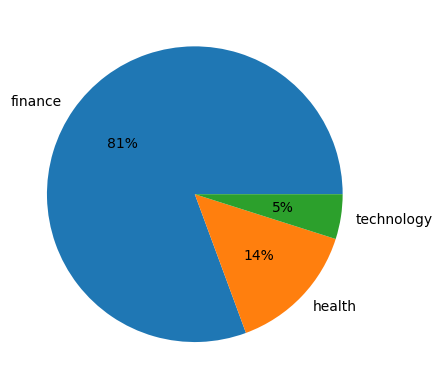

In [ ]:

import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

sector_names = ['finance', 'health', 'technology']
pred_sector_list = np.argmax(industrial_pred, axis=1)
sector_pred_list = [sector_names[pred] for pred in pred_sector_list]
sayac = dict(Counter(sector_pred_list))
etiketler = list(sayac.keys())
degerler = list(sayac.values())
plt.pie(degerler, labels=etiketler, autopct='%1.0f%%')
plt.show()

***Görüldüğü üzere industrials sektörü en çok finance sektörüne benzemektedir.***